# Import Library

In [58]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)
# Visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew
# Feature Cleaning
from scipy.stats import zscore, median_abs_deviation
# Feature Imputation
from sklearn.impute import KNNImputer ,SimpleImputer
# Features Encoding
from sklearn.preprocessing import  LabelEncoder , OneHotEncoder
import category_encoders as ce
# Transformation
from scipy import stats
from sklearn.preprocessing import PowerTransformer
# Scaling
from sklearn.preprocessing import RobustScaler , StandardScaler , MinMaxScaler , MaxAbsScaler , Normalizer
# PCA
from sklearn.decomposition import PCA
# LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# SVD
from sklearn.decomposition import TruncatedSVD
# M_Info
from sklearn.feature_selection import mutual_info_classif , SelectPercentile
from sklearn.feature_selection import SelectKBest
# Isolation Forest
from sklearn.ensemble import IsolationForest
# pipeline 
from sklearn.pipeline import Pipeline

# Data Loading

In [59]:
df=pd.read_csv('Tut/CC GENERAL.csv')

In [60]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [62]:
df.shape

(8950, 18)

# Data Exploration

### Variable Identification

In [63]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [64]:
numeric_df = df.select_dtypes(include=['number'])

categorical_df = df.select_dtypes(include=['object', 'category'])

In [65]:
#target=''

###  Univariate Analysis

In [66]:
df[numeric_col].describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [67]:
df[categorical_col].describe(include='object')

CUST_ID
count     8950
unique    8950
top     C10001
freq         1

In [68]:
df=df.drop(columns=['CUST_ID'])

# Feature Cleaning

### missing values

In [69]:
df.isnull().sum()/df.shape[0]

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [70]:
df=df.dropna(subset=['CREDIT_LIMIT'])

In [71]:
df.isnull().sum()/df.shape[0]

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000000
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034976
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

### Special values

### outliers

In [72]:
def total_outliers_z_score(df, threshold=3):
    # Create a boolean Series to track rows with outliers
    outlier_rows = pd.Series(False, index=df.index)

    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Z-scores
        df['z_score'] = zscore(df[column])
        
        # Identify outliers
        outliers = np.abs(df['z_score']) > threshold
        
        # Update the outlier_rows boolean Series
        outlier_rows = outlier_rows | outliers

    # Drop the last created column
    df.drop(['z_score'], axis=1, inplace=True)

    # Get the indexes of the outlier rows
    outlier_indexes = df.index[outlier_rows]

    # Total number of unique rows with at least one outlier
    total_outliers = outlier_rows.sum()

    return total_outliers, outlier_indexes


def total_outliers_modified_z_score(df, threshold=3.5):
    # Create a boolean Series to track rows with outliers
    outlier_rows = pd.Series(False, index=df.index)

    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Median Absolute Deviation (MAD)
        mad = median_abs_deviation(df[column])
        median = df[column].median()
        
        # Calculate Modified Z-scores
        df['mod_z_score'] = 0.6745 * (df[column] - median) / mad
        
        # Identify outliers
        outliers = np.abs(df['mod_z_score']) > threshold
        
        # Update the outlier_rows boolean Series
        outlier_rows = outlier_rows | outliers       

    # drop the last created col
    df.drop(['mod_z_score'], axis=1, inplace=True)
        
    # Get the indexes of the outlier rows
    outlier_indexes = df.index[outlier_rows]

    # Total number of unique rows with at least one outlier
    total_outliers = outlier_rows.sum()

    return total_outliers, outlier_indexes


def total_outliers_iqr(df, outlier_threshold=1.5):
    # Create a boolean Series to track rows with outliers
    outlier_rows = pd.Series(False, index=df.index)
    
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR
        
        # Identify outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        
        # Update the outlier_rows boolean Series
        outlier_rows = outlier_rows | outliers
    
    # Get the indexes of the outlier rows
    outlier_indexes = df.index[outlier_rows]

    # Total number of unique rows with at least one outlier
    total_outliers = outlier_rows.sum()

    return total_outliers, outlier_indexes


In [73]:
total_outliers_z , outlier_indexes_z = total_outliers_z_score(df)
print(f"Total number of rows with outliers using Z-score: {total_outliers_z}    &&& Percentage : ", total_outliers_z / df.shape[0])


total_outliers_mod_z, outlier_indexes_mod_z = total_outliers_modified_z_score(df)
print(f"Total number of rows with outliers using Modified Z-score: {total_outliers_mod_z}   &&& Percentage : ", total_outliers_mod_z / df.shape[0])

total_outliers_iqr, outlier_indexes_iqr= total_outliers_iqr(df)
print(f"Total number of rows with outliers using IQR: {total_outliers_iqr}    &&& Percentage : ", total_outliers_iqr / df.shape[0])

Total number of rows with outliers using Z-score: 1441    &&& Percentage :  0.1610235780534138
Total number of rows with outliers using Modified Z-score: 8380   &&& Percentage :  0.9364174768130518
Total number of rows with outliers using IQR: 5955    &&& Percentage :  0.6654374790479383


#### Action 

In [74]:
# df= df.drop(outlier_indexes_z)

# feature engineering 

### Decompose & Discretization

In [75]:
df.head(20)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
1   3202.467416           0.909091       0.00              0.00   
2   2495.148862           1.000000     773.17            773.17   
3   1666.670542           0.636364    1499.00           1499.00   
4    817.714335           1.000000      16.00             16.00   
5   1809.828751           1.000000    1333.28              0.00   
6    627.260806           1.000000    7091.01           6402.63   
7   1823.652743           1.000000     436.20              0.00   
8   1014.926473           1.000000     861.49            661.49   
9    152.225975           0.545455    1281.60           1281.60   
10  1293.124939           1.000000     920.12              0.00   
11   630.794744           0.818182    1492.18           1492.18   
12  1516.928620           1.000000    3217.99           2500.23   
13   921.693369           1.000000    2137.93            419.96   
14  2772.772734           1.000000       0.00              0.00   
15  6886.213231           1.000000    1611.70              0.00   
16  2072.074354           0.875000       0.00              0.00   
17    41.089489           0.454545     519.00              0.00   
18  1989.072228           1.000000     504.35            166.00   
19  3577.970933           1.000000     398.64              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.40      0.000000             0.166667   
1                     0.00   6442.945483             0.000000   
2                     0.00      0.000000             1.000000   
3                     0.00    205.788017             0.083333   
4                     0.00      0.000000             0.083333   
5                  1333.28      0.000000             0.666667   
6                   688.38      0.000000             1.000000   
7                   436.20      0.000000             1.000000   
8                   200.00      0.000000             0.333333   
9                     0.00      0.000000             0.166667   
10                  920.12      0.000000             1.000000   
11                    0.00      0.000000             0.250000   
12                  717.76      0.000000             1.000000   
13                 1717.97      0.000000             0.750000   
14                    0.00    346.811390             0.000000   
15                 1611.70   2301.491267             0.500000   
16                    0.00   2784.274703             0.000000   
17                  519.00      0.000000             0.416667   
18                  338.35      0.000000             0.666667   
19                  398.64      0.000000             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
1                     0.000000                          0.000000   
2                     1.000000                          0.000000   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
5                     0.000000                          0.583333   
6                     1.000000                          1.000000   
7                     0.000000                          1.000000   
8                     0.083333                          0.250000   
9                     0.166667                          0.000000   
10                    0.000000                          1.000000   
11                    0.250000                          0.000000   
12                    0.250000                          0.916667   
13                    0.166667                          0.750000   
14                    0.000000                          0.000000   
15                    0.000000                          0.500000   
16                    0.000000                          0.000000   
17        

In [76]:
# no Discretization or Decompose needed 

### Crossing 

In [77]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
categorical_col = [col for col in df.columns if df[col].dtype == 'object']

In [78]:
for col in categorical_col:
    print(df[col].value_counts(), '\n')

In [79]:
numeric_col

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

# feature Imputation 

## Not tested for this data -> check the code correctness 

## Hot-Deck imputation 

### Random Hot-Deck

In [80]:
def random_Hot_deck_imputation(df_train, df_test, cols):
    for col in cols:
        # Get non-missing values from the training set to act as donors
        donor_values = df_train[col].dropna().values
        
        # Impute missing values in the training set
        missing_indices_train = df_train[df_train[col].isna()].index
        df_train.loc[missing_indices_train, col] = np.random.choice(donor_values, size=len(missing_indices_train), replace=True)
        
        # Impute missing values in the test set using training set donor values
        missing_indices_test = df_test[df_test[col].isna()].index
        df_test.loc[missing_indices_test, col] = np.random.choice(donor_values, size=len(missing_indices_test), replace=True)
    
    return df_train, df_test

In [81]:
### Old way I used before 

def fillMissing_SaveDist(df_train, df_test, cols):
    for col in cols:
        fillList = df_train[col].dropna()

        df_train[col] = df_train[col].fillna(pd.Series(np.random.choice(fillList, len(df_train.index))))
        df_test[col] = df_test[col].fillna(pd.Series(np.random.choice(fillList, len(df_test.index))))

    return df_train, df_test

### Sequential Hot_Deck

In [82]:
def sequential_Hot_deck_imputation(df,cols):
    for col in cols:
        df[col]=df[col].fillna(method = 'ffill' )
        # Backward fill if forward fill left any NaNs
        df[col]=df[col].fillna(method = 'bfill' )
    return df

## Simple Imputation 

In [83]:
def simpleImputation(train_df, test_df, cols, method='mean'):
    imputer = SimpleImputer(strategy=method)
    train_df[cols] = imputer.fit_transform(train_df[cols])
    test_df[cols] = imputer.transform(test_df[cols])

    return train_df, test_df

## KNN Imputation 

In [84]:
def knnImputation_numericalCol(df, cols, neighbors):
    knn_imputer = KNNImputer(n_neighbors=neighbors)
    df[cols] =knn_imputer.fit_transform(df[cols])

    return df

In [85]:
df=knnImputation_numericalCol(df,['MINIMUM_PAYMENTS'],5)

##### Action 

In [86]:
df.isnull().sum()/df.shape[0]

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

# Correlation

In [87]:
def corr_methods(df,method=''):
    if method == '':
        corr_matrix= df.corr()
    elif method == 'spearman':
        corr_matrix= df.corr(method='spearman')
    elif method == 'kendall':
        corr_matrix= df.corr(method='kendall')
    
    # Mask the upper triangle to avoid duplicate pairs
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    upper = corr_matrix.where(mask)

    # Find the index of the maximum correlation value
    max_corr = upper.abs().unstack().sort_values(ascending=False)
    max_corr = max_corr[max_corr < 1]  
    max_corr = max_corr[max_corr>0.8]

    return max_corr



In [88]:
# linear correlation 
corr_methods(df)

ONEOFF_PURCHASES                  PURCHASES              0.916844
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY    0.862921
dtype: float64

In [89]:
# non linear correlation
corr_methods(df,'spearman')

CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY    0.983428
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES          0.952433
CASH_ADVANCE_TRX                  CASH_ADVANCE              0.951831
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE              0.940773
PURCHASES_TRX                     PURCHASES_FREQUENCY       0.923567
PURCHASES_INSTALLMENTS_FREQUENCY  INSTALLMENTS_PURCHASES    0.923424
PURCHASES_TRX                     PURCHASES                 0.885138
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY       0.851542
MINIMUM_PAYMENTS                  BALANCE                   0.825178
dtype: float64

In [90]:
corr_methods(df,'kendall')

CASH_ADVANCE_TRX            CASH_ADVANCE_FREQUENCY    0.924526
ONEOFF_PURCHASES_FREQUENCY  ONEOFF_PURCHASES          0.840184
CASH_ADVANCE_TRX            CASH_ADVANCE              0.835905
CASH_ADVANCE_FREQUENCY      CASH_ADVANCE              0.816554
PURCHASES_TRX               PURCHASES_FREQUENCY       0.815959
dtype: float64

###### Action 

# Transformation

In [91]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [92]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, constant=1):
        self.constant = constant

    def fit(self, X, y=None):
        # No fitting necessary for log transformation
        return self

    def transform(self, X):
        # Apply log transformation
        return np.log(X + self.constant)
    
class BoxCoxTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lmbdas = {}

    def fit(self, X, y=None):
        self.lmbdas = {}
        for col in X.columns:
            if (X[col] > 0).all():
                # Fit Box-Cox transformation for positive-only columns
                _, lmbda = stats.boxcox(X[col])
                self.lmbdas[col] = lmbda
            elif (X[col] >= 0).all():
                # Shift column and fit Box-Cox for non-negative columns
                shift_value = 1
                _, lmbda = stats.boxcox(X[col] + shift_value)
                self.lmbdas[col] = (lmbda, shift_value)
            else:
                # Column contains negative values, which are not suitable for Box-Cox
                self.lmbdas[col] = None
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in X.columns:
            if self.lmbdas[col] is not None:
                if isinstance(self.lmbdas[col], tuple):
                    lmbda, shift_value = self.lmbdas[col]
                    X_transformed[col] = stats.boxcox(X[col] + shift_value, lmbda=lmbda)
                else:
                    X_transformed[col] = stats.boxcox(X[col], lmbda=self.lmbdas[col])
            else:
                print(f"Column {col} contains negative values and cannot be Box-Cox transformed.")
        return X_transformed
    
class YeoJohnsonTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, standardize=True):
        self.standardize = standardize
        self.transformer = PowerTransformer(method='yeo-johnson', standardize=self.standardize)

    def fit(self, X, y=None):
        self.transformer.fit(X)
        return self

    def transform(self, X):
        X_transformed = self.transformer.transform(X)
        # Convert back to DataFrame to retain column names and index
        X_transformed = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)
        return X_transformed

In [93]:
# Log Transformation
def log_transform(df, constant=1):
    df = np.log(df + constant)
    return df

# Square Root Transformation
def square_root_transform(df):
    df = np.sqrt(df)
    return df

# Box-Cox Transformation
# Note: This requires positive values (> 0)
def box_cox_transform(df):
    df_transformed = df.copy()
    
    for col in df.columns:
        if (df[col] > 0).all():
            df_transformed[col], lmbda = stats.boxcox(df[col])
        
        elif (df[col] >= 0).all():
            shift_value = 1
            df_transformed[col], lmbda = stats.boxcox(df[col] + shift_value)
            print(f"Column {col} contains zero values and was shifted by {shift_value} to apply Box-Cox.")
        
        else:
            print(f"Column {col} contains negative values and cannot be Box-Cox transformed. Consider using Yeo-Johnson.")
    
    return df_transformed

# Yeo-Johnson Transformation
def yeo_johnson_transform(df):
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    df_transformed = transformer.fit_transform(df)
    
    # Convert back to DataFrame to retain column names and index
    df_transformed = pd.DataFrame(df_transformed, columns=df.columns, index=df.index)
    
    return df_transformed


In [94]:
# df = log_transform(df, constant=1)
# df = square_root_transform(df)
# df = box_cox_transform(df)
# df = yeo_johnson_transform(df)

# Feature Scaling 

In [95]:
scaler = StandardScaler()
# df = scaler.fit_transform(df)


In [96]:
scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
 

In [97]:
scaler = RobustScaler()
# df = scaler.fit_transform(df)
 

In [98]:
scaler = MaxAbsScaler()
# df = scaler.fit_transform(df)
 

In [99]:
scaler = Normalizer(norm='l2')
# df = scaler.fit_transform(df)
 

# Dimentionality Reduction 

### PCA 

In [100]:
pca = PCA(n_components = 0.99)
# df = pca.fit_transform(df)

In [101]:
df.shape

(8949, 17)

#### PCA Visually 

In [102]:
scaler = StandardScaler()
pca = PCA()
df_scaled = scaler.fit_transform(LogTransformer().fit_transform(df))
df_red = pca.fit_transform(df_scaled) ##  Scale df before 
d = {'Number of EigenVector': np.arange(1,len(pd.DataFrame(df).columns)+1), 'Varaiability Captured': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)
px.line(df, x='Number of EigenVector', y='Varaiability Captured',markers=True,
                       title='EigenVectors VS Varaiability Captured')

##### ACTION

In [47]:
## 

### LDA
###### Linear Discriminant Analysis

In [48]:
# from sklearn.model_selection import cross_val_score

# n_features = X_train.shape[1]
# n_classes = len(set(y_train))

# # Calculate the valid range for n_components
# max_components = min(n_features, n_classes - 1)
# possible_components = range(1, max_components + 1) 
# scores = []

# for n in possible_components:
#     lda = LinearDiscriminantAnalysis(n_components=n)
#     cv_score = cross_val_score(lda, X_train, y_train, cv=5, scoring='accuracy')
#     scores.append(cv_score.mean())

# # Find the best number of components based on cross-validation score
# best_n_components = possible_components[scores.index(max(scores))]
# print(f'Best number of components: {best_n_components}')

##### Action 

In [49]:
# lda = LinearDiscriminantAnalysis(n_components=1)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test) 

### SVD

###### SVC finds the direction of the maximum stretching 

In [50]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)


# svd = TruncatedSVD(n_components=X_train.shape[1])  # Use all components or a subset
# X_train_red = svd.fit_transform(X_train_scaled)

# # Step 3: Create DataFrame to plot the explained variance
# d = {
#     'Number of Singular Vectors': np.arange(1, len(pd.DataFrame(X_train).columns) + 1),
#     'Variability Captured': np.cumsum(svd.explained_variance_ratio_)
# }
# df = pd.DataFrame(data=d)

# # Step 4: Visualize the cumulative variance captured
# fig = px.line(df, x='Number of Singular Vectors', y='Variability Captured', markers=True,
#               title='Singular Vectors vs Variability Captured')
# fig.show()

#### ACTION 

In [51]:
# svd = TruncatedSVD(n_components=31, n_iter=7, random_state=42)
# X_train=svd.fit_transform(X_train)
# X_test=svd.transform(X_test)

In [52]:
# pd.DataFrame(X_train).head()

# Clustering

In [53]:
pd.DataFrame(df).head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.304943          0.000000      12  
4   678.334763        244.791237          0.000000      12

## KMean

### All combination 

In [303]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import itertools

In [304]:
transformations = [
    ('none', None),  # No transformation
    ('log', LogTransformer(constant=1)),
    ('yeo_johnson', YeoJohnsonTransformer(standardize=True)),
]

# Scaling methods
scaling_methods = [
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler()),
    ('robust', RobustScaler())
]

# Dimensionality reduction options
dim_reduction_options = [
    ('none', None),  # No PCA
    ('pca_95%', PCA(n_components=0.95)),
    ('lda_1', LinearDiscriminantAnalysis(n_components=1)),
    ('svd_32', TruncatedSVD(n_components=32, n_iter=7, random_state=42))
]

# Clustering methods
clustering_methods = [
    ('kmeans', KMeans(n_clusters=3, init='k-means++', random_state=42)),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5)),
    ('agglomerative', AgglomerativeClustering(n_clusters=3))
]

combinations = list(itertools.product( transformations, scaling_methods, dim_reduction_options, clustering_methods))

### Function to plot wcss and silhouette 

In [325]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
def plot_wcss_silhouette(df, cluster_range=(2, 10)):    
    wcss = []
    silhouette_scores = []
    
    for i in range(cluster_range[0], cluster_range[1]): 
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df)
        
        # Append WCSS (within-cluster sum of squares)
        wcss.append(kmeans.inertia_)
        
        # Calculate Silhouette Score and append it
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(df, labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting both WCSS (Elbow Method) and Silhouette Score
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('WCSS', color='tab:blue')
    ax1.plot(range(cluster_range[0], cluster_range[1]), wcss, color='tab:blue', label='WCSS')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the Silhouette Scores
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Silhouette Score', color='tab:green')
    ax2.plot(range(cluster_range[0], cluster_range[1]), silhouette_scores, color='tab:green', label='Silhouette Score')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title('The Elbow Method and Silhouette Score')
    plt.show()

### plot the best clusters

In [54]:
def visualize_clusters_with_pca(df , labels):

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df)

    df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = labels

    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set2', s=100, alpha=0.7)
    plt.title(f'Clusters visualized with PCA ')
    plt.show()


### boxCox and Standard

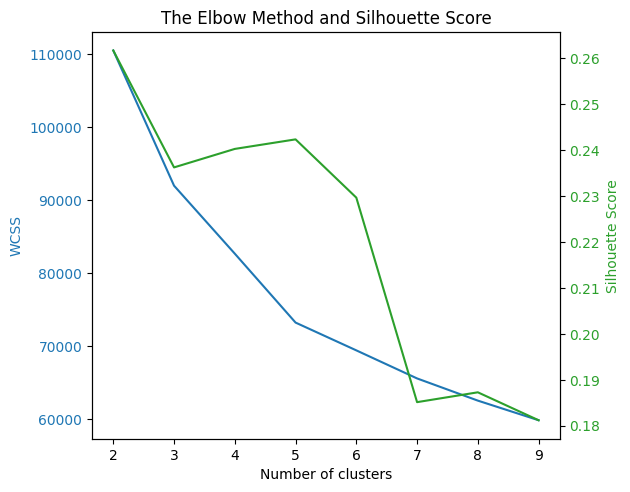

In [327]:
plot_wcss_silhouette(StandardScaler().fit_transform(BoxCoxTransformer().fit_transform(df)))

### yeo_johnson and standard

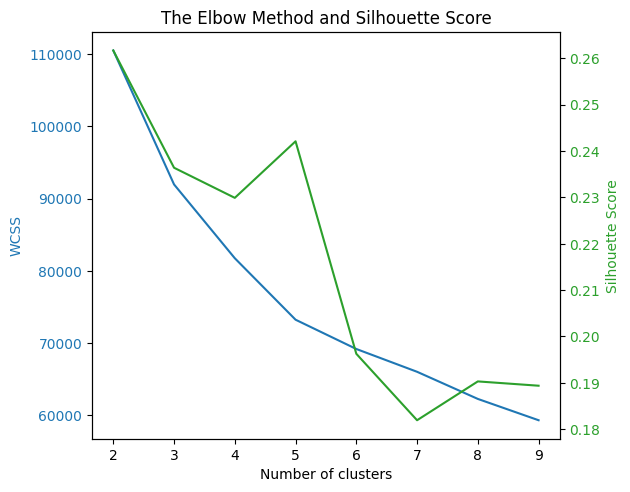

In [328]:
plot_wcss_silhouette(StandardScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df)))

### yeo_johnson and robust

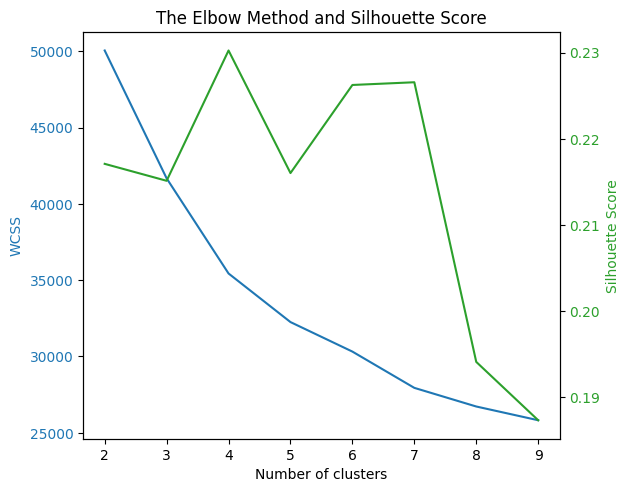

In [329]:
plot_wcss_silhouette(RobustScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df)))

### yeo_johnson and minmax


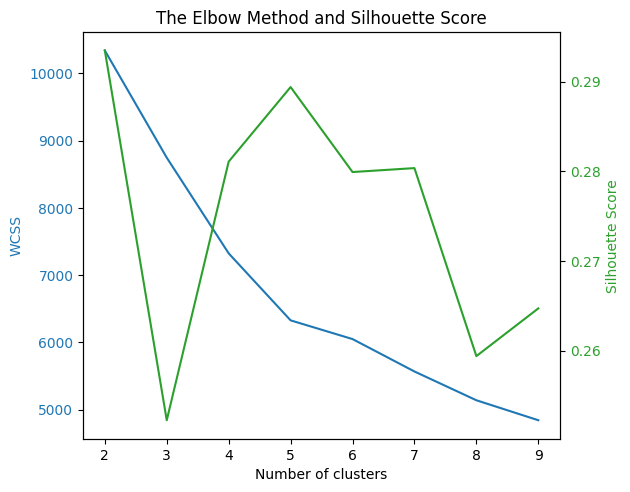

In [330]:
plot_wcss_silhouette(MinMaxScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df)))

### log and MinMax

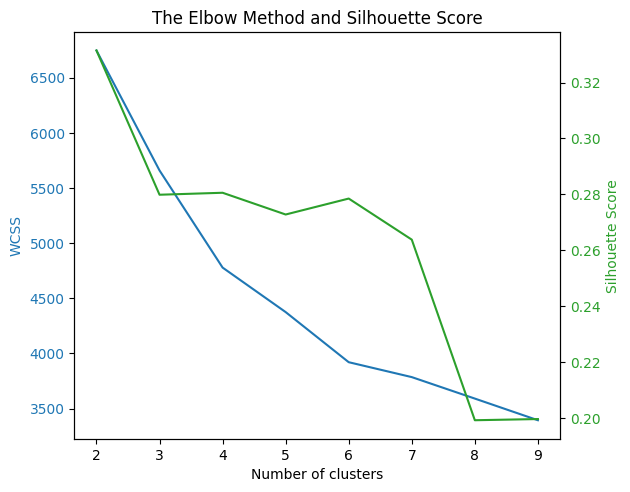

In [331]:
plot_wcss_silhouette(MinMaxScaler().fit_transform(LogTransformer().fit_transform(df)))

### boxCox and MinMax

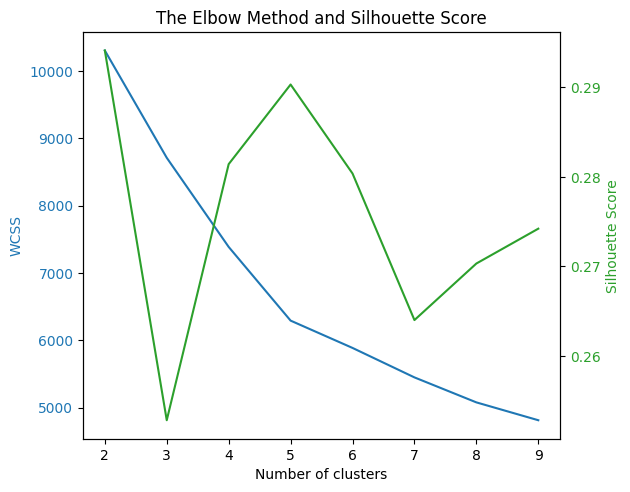

In [333]:
plot_wcss_silhouette(MinMaxScaler().fit_transform(BoxCoxTransformer().fit_transform(df)))

## Visualize the best clusters 

In [59]:
df_yeo_minmax=MinMaxScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df))
df_yeo_std=StandardScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df))
df_yeo_robust=RobustScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df))
df_log_minmax=MinMaxScaler().fit_transform(LogTransformer().fit_transform(df))
df_log_std=StandardScaler().fit_transform(LogTransformer().fit_transform(df))
df_log_robust=RobustScaler().fit_transform(LogTransformer().fit_transform(df))
df_minmax=MinMaxScaler().fit_transform(df)
df_std=StandardScaler().fit_transform(df)
df_robust=RobustScaler().fit_transform(df)

### 5 || 6  clusters 

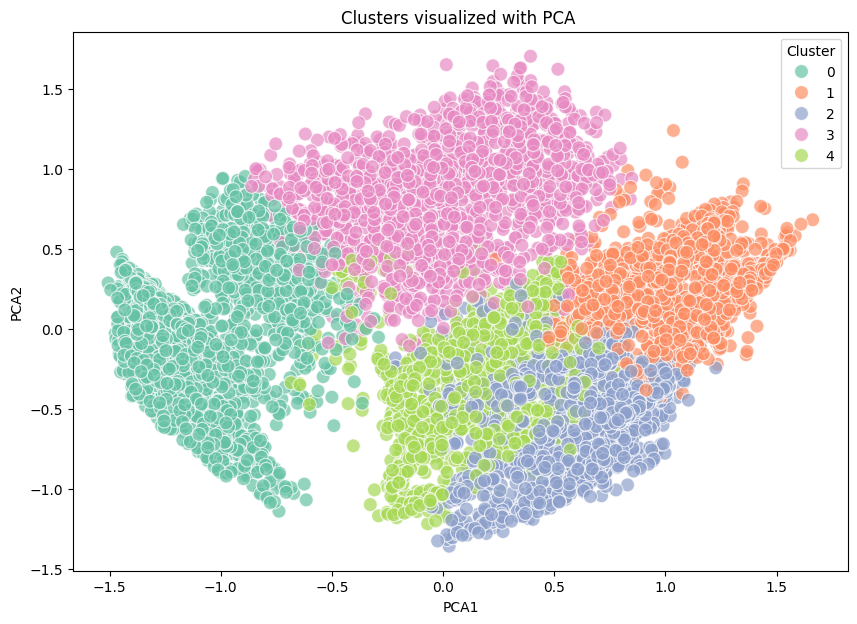

In [336]:

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_yeo_minmax)

visualize_clusters_with_pca(df_yeo_minmax , labels)

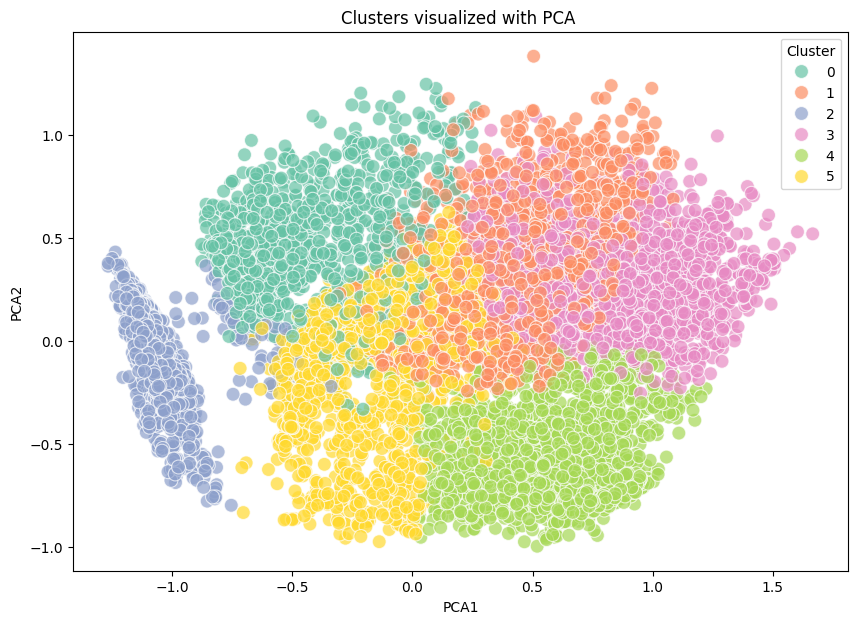

In [337]:
df_log_minmax=MinMaxScaler().fit_transform(LogTransformer().fit_transform(df))

kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df_log_minmax)

visualize_clusters_with_pca(df_log_minmax , labels)

# DBSCAN

## search how to choose the value of eps and min_sample ->>> hint -> NearestNeighbour

In [360]:
def evaluate_dbscan(df, eps_range, min_sample_range):
    # Initialize arrays to store results
    silhouette_scores = np.zeros((len(eps_range), len(min_sample_range)))

    for i, eps in enumerate(eps_range):
        for j, min_samples in enumerate(min_sample_range):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(df)
            
            # Calculate Silhouette score only if there is more than one cluster
            if len(set(labels)) > 1:
                score = silhouette_score(df, labels)
            else:
                score = -1  # Silhouette score is not defined for single cluster

            silhouette_scores[i, j] = score

    # Plot results
    plt.figure(figsize=(12, 8))
    plt.imshow(silhouette_scores, aspect='auto', cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Silhouette Score')
    plt.xticks(ticks=np.arange(len(min_sample_range)), labels=min_sample_range)
    plt.yticks(ticks=np.arange(len(eps_range)), labels=np.round(eps_range, 2))
    plt.xlabel('min_samples')
    plt.ylabel('eps')
    plt.title('Silhouette Scores for DBSCAN Clustering')
    plt.show()

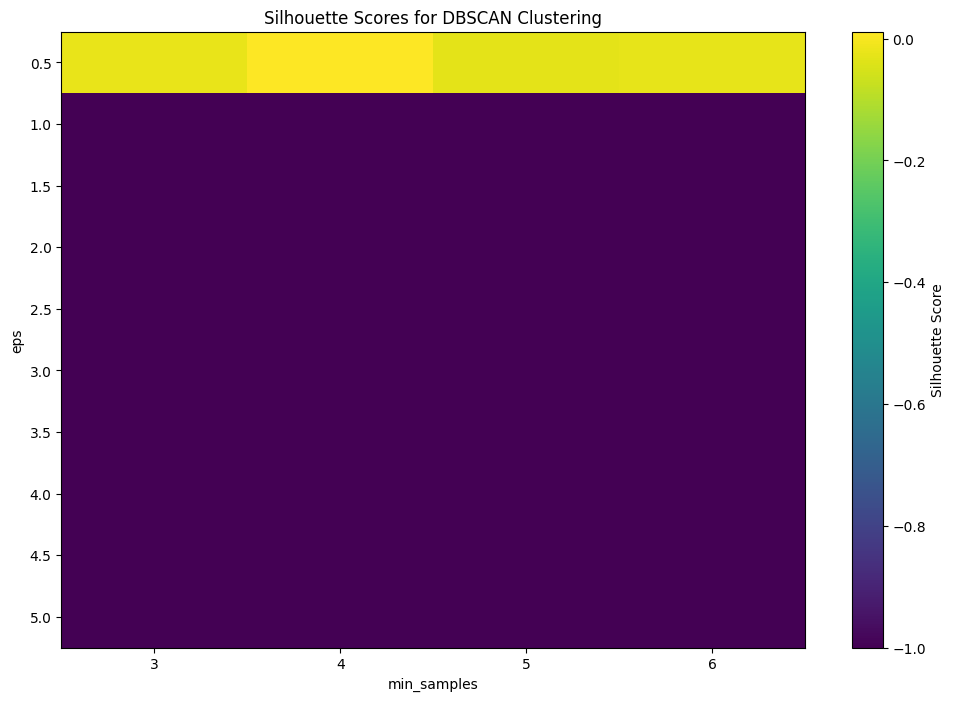

In [361]:
eps_range = np.linspace(0.5,5,10)
min_sample_range = range(3,7)
evaluate_dbscan(df_yeo_minmax , eps_range , min_sample_range)

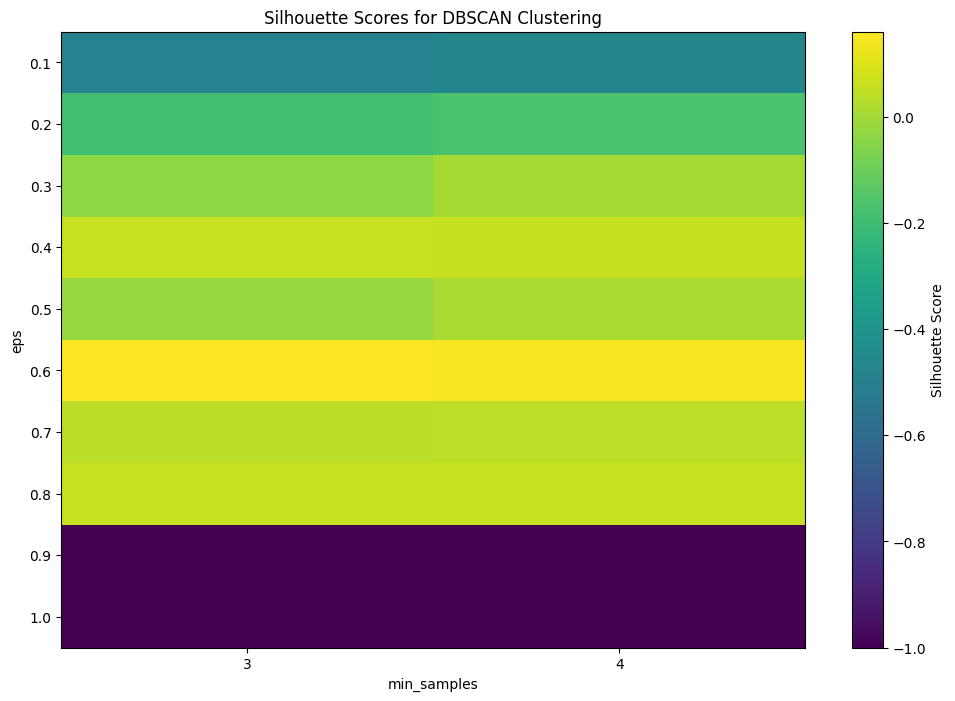

In [362]:
eps_range = np.linspace(0.1,1,10)
min_sample_range = range(3,5)
evaluate_dbscan(df_yeo_minmax , eps_range , min_sample_range)

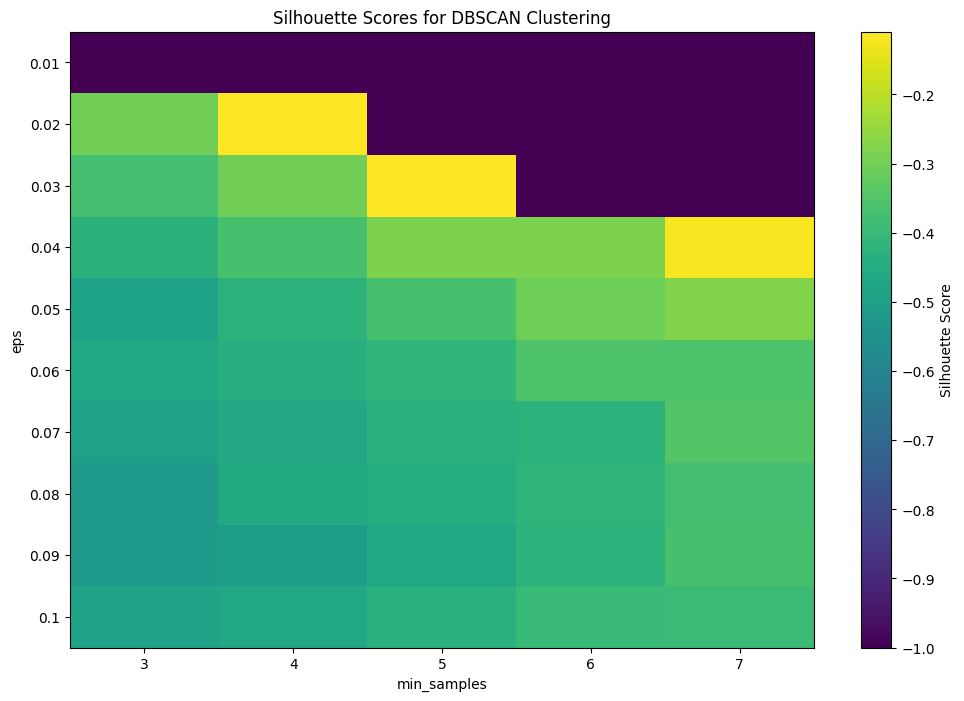

In [366]:
eps_range = np.linspace(0.01,0.1,10)
min_sample_range = range(3,8)
evaluate_dbscan(df_yeo_minmax , eps_range , min_sample_range)

##### minmax the values from 0 to 1 so it make sense 

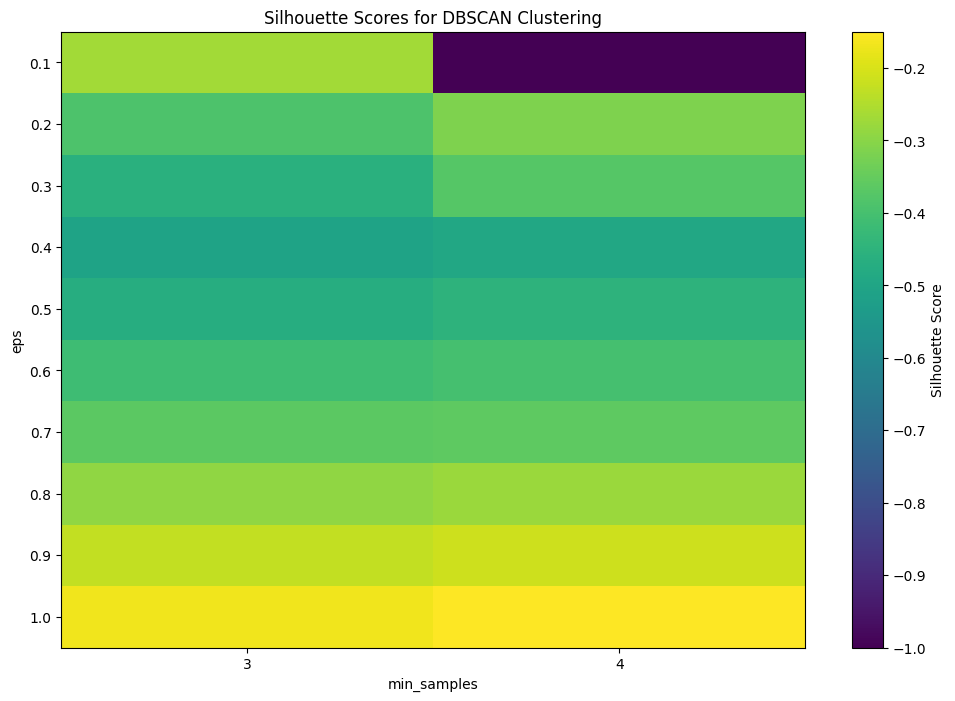

In [363]:
eps_range = np.linspace(0.1,1,10)
min_sample_range = range(3,5)
df_yeo_stand=StandardScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df))
evaluate_dbscan(df_yeo_stand , eps_range , min_sample_range)

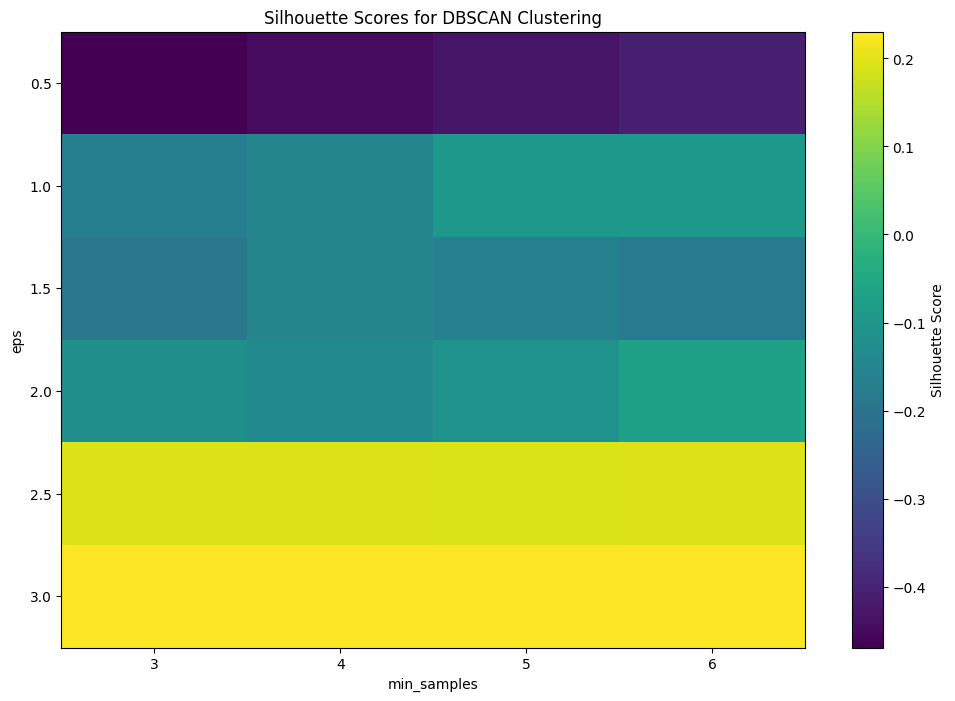

In [364]:
eps_range = np.linspace(0.5,3,6)
min_sample_range = range(3,7)
evaluate_dbscan(df_yeo_stand , eps_range , min_sample_range)

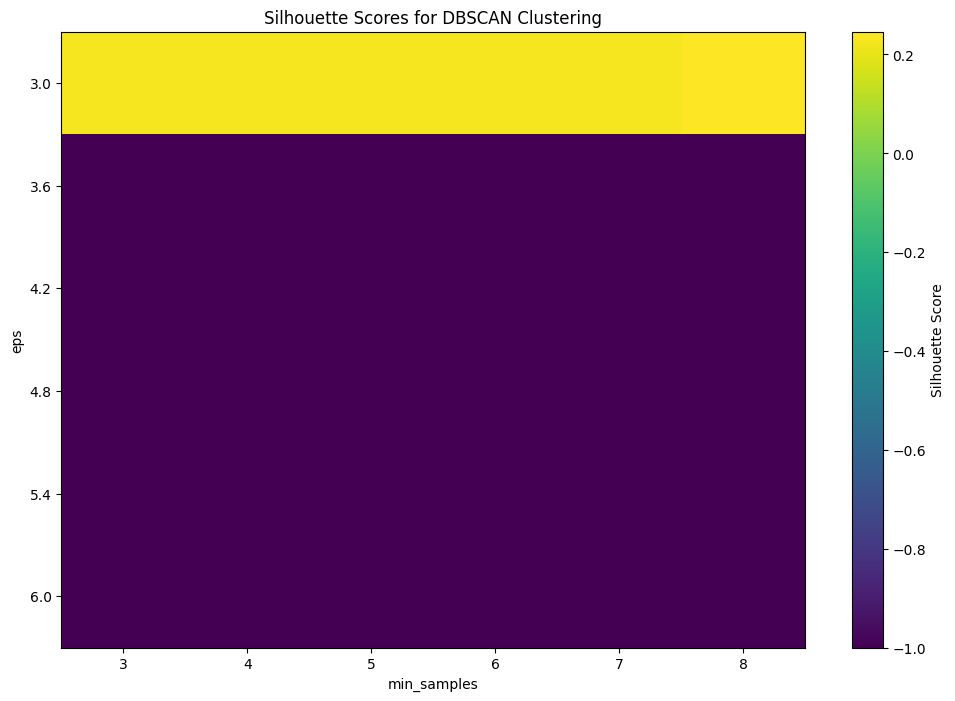

In [365]:
eps_range = np.linspace(3,6,6)
min_sample_range = range(3,9)
evaluate_dbscan(df_yeo_stand , eps_range , min_sample_range)

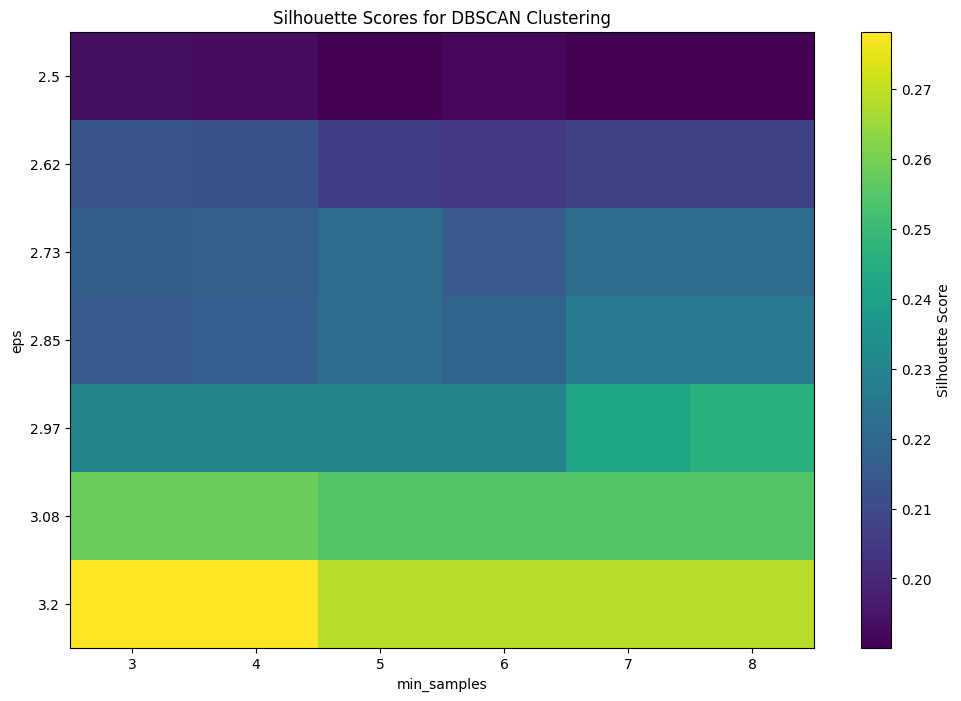

In [367]:
eps_range = np.linspace(2.5,3.2,7)
min_sample_range = range(3,9)
evaluate_dbscan(df_yeo_stand , eps_range , min_sample_range)

#### stander scaler max value 3 -> make sense too 

#### try robust 

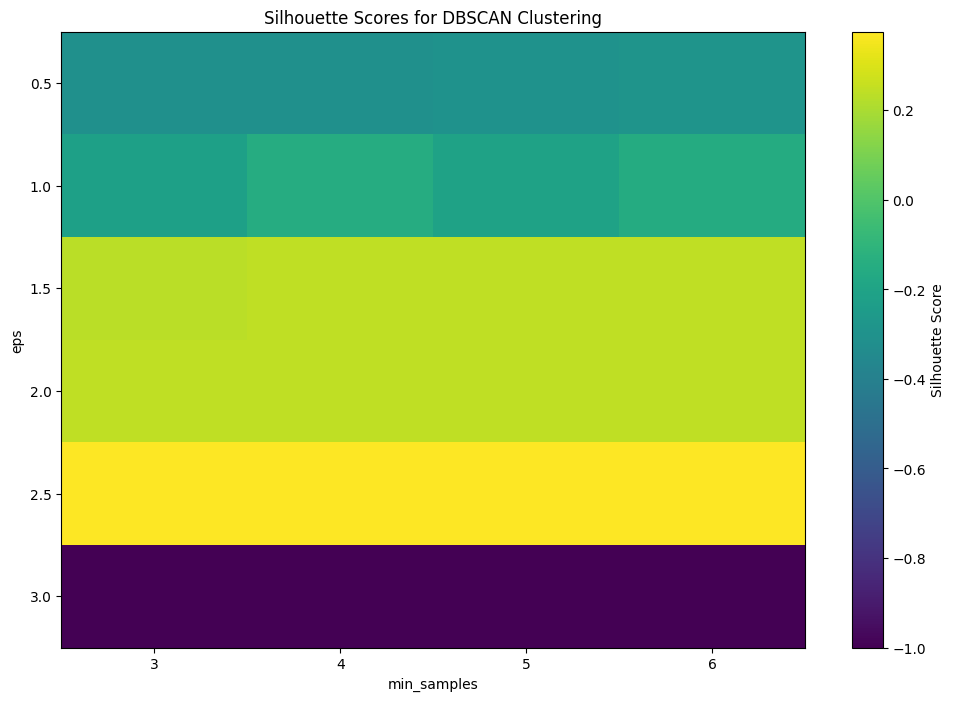

In [368]:
eps_range = np.linspace(0.5,3,6)
min_sample_range = range(3,7)
df_yeo_robust=RobustScaler().fit_transform(YeoJohnsonTransformer().fit_transform(df))
evaluate_dbscan(df_yeo_robust , eps_range , min_sample_range)

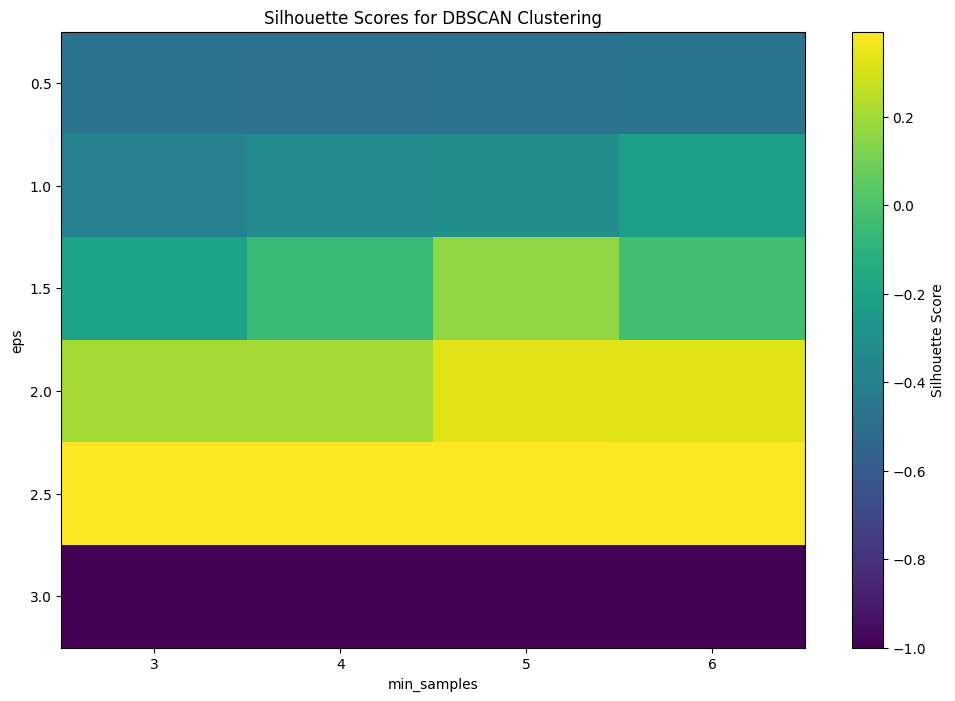

In [389]:
eps_range = np.linspace(0.5,3,6)
min_sample_range = range(3,7)
df_log_robust=RobustScaler().fit_transform(LogTransformer().fit_transform(df))
evaluate_dbscan(df_log_robust , eps_range , min_sample_range)

##### with out transformation 

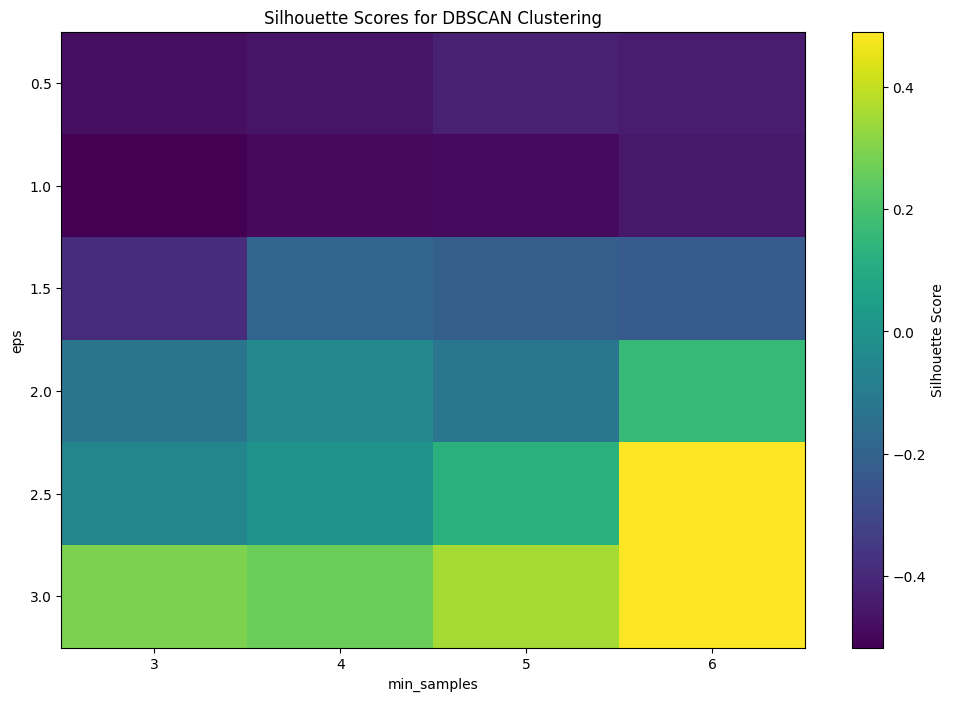

In [390]:
eps_range = np.linspace(0.5,3,6)
min_sample_range = range(3,7)
df_robust=RobustScaler().fit_transform(df)
evaluate_dbscan(df_robust , eps_range , min_sample_range)

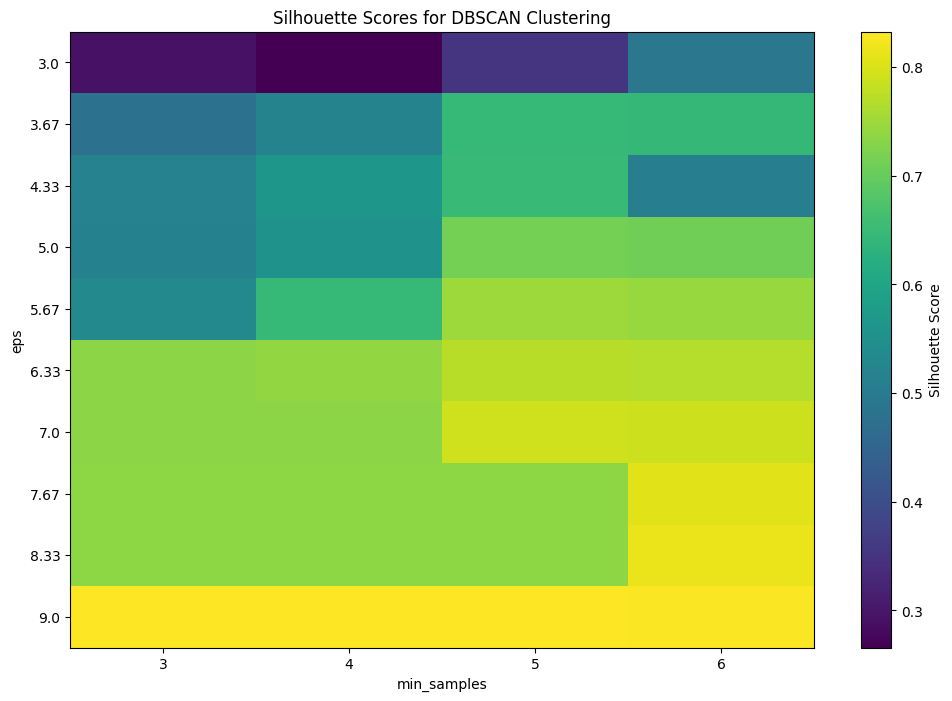

In [393]:
eps_range = np.linspace(3,9,10)
min_sample_range = range(3,7)
df_robust=RobustScaler().fit_transform(df)
evaluate_dbscan(df_robust , eps_range , min_sample_range)

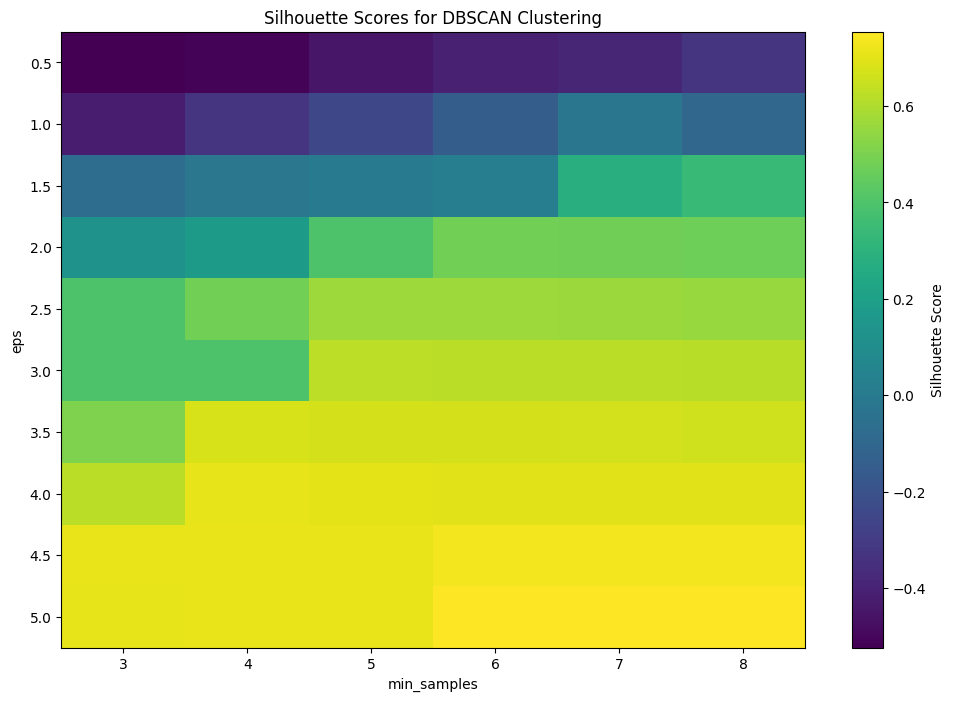

In [394]:
eps_range = np.linspace(0.5,5,10)
min_sample_range = range(3,9)
df_std=StandardScaler().fit_transform(df)
evaluate_dbscan(df_std , eps_range , min_sample_range)

In [398]:
# eps_range = np.linspace(0.5,5,10)
# min_sample_range = range(3,9)
# df_minmax=MinMaxScaler().fit_transform(df)
# evaluate_dbscan(df_minmax , eps_range , min_sample_range)




# did not settled

#### best parameters with transformation 

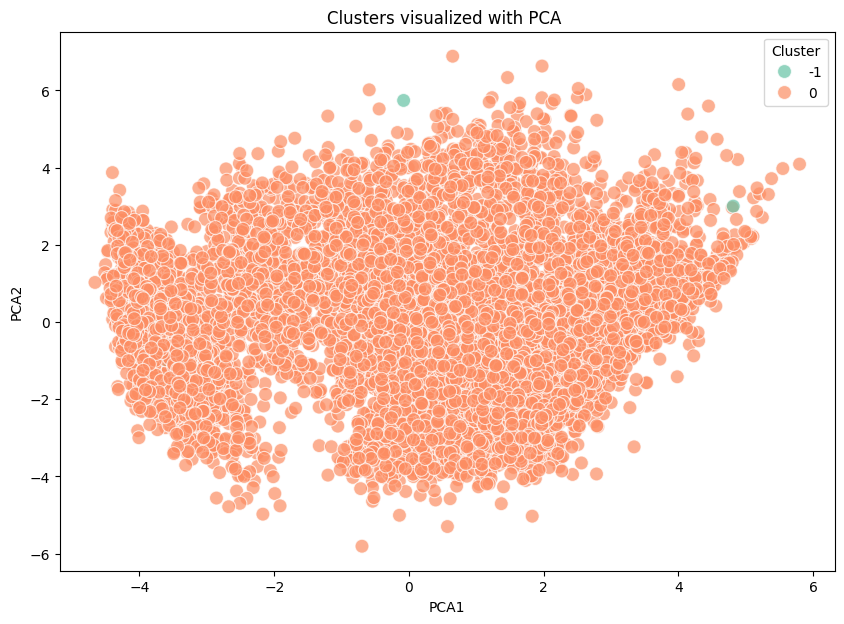

In [377]:
dbscan = DBSCAN(eps=3.2,min_samples=4)
labels = dbscan.fit_predict(df_yeo_stand)

visualize_clusters_with_pca(df_yeo_stand , labels)

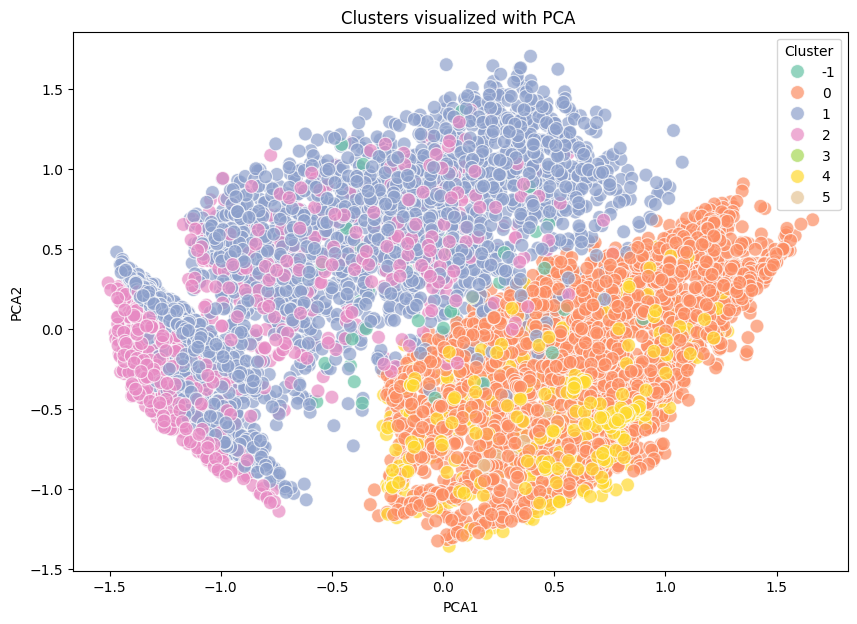

In [380]:
dbscan = DBSCAN(eps=0.6,min_samples=5)
labels = dbscan.fit_predict(df_yeo_minmax)

visualize_clusters_with_pca(df_yeo_minmax , labels)

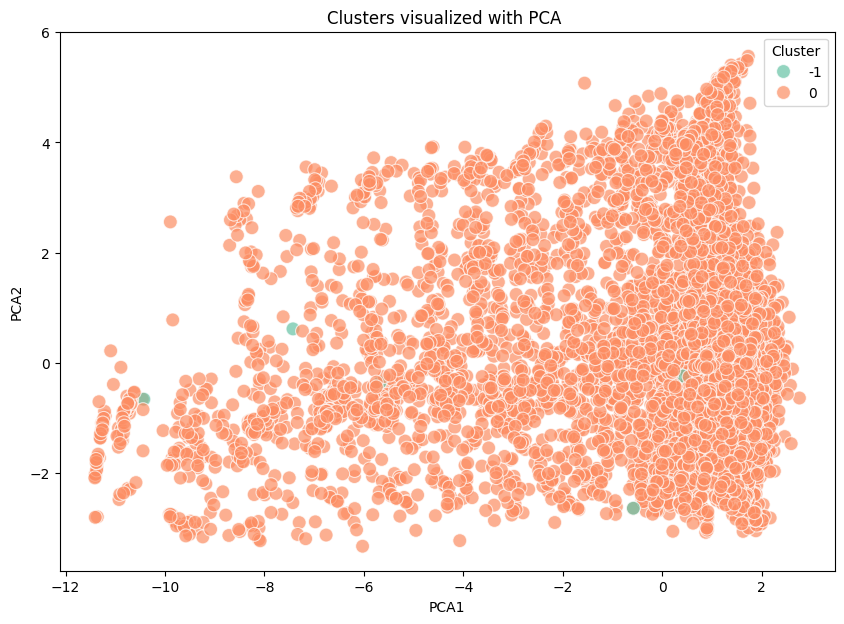

In [387]:
dbscan = DBSCAN(eps=2.5,min_samples=5)
labels = dbscan.fit_predict(df_log_robust)

visualize_clusters_with_pca(df_log_robust , labels)

##### without transformations 

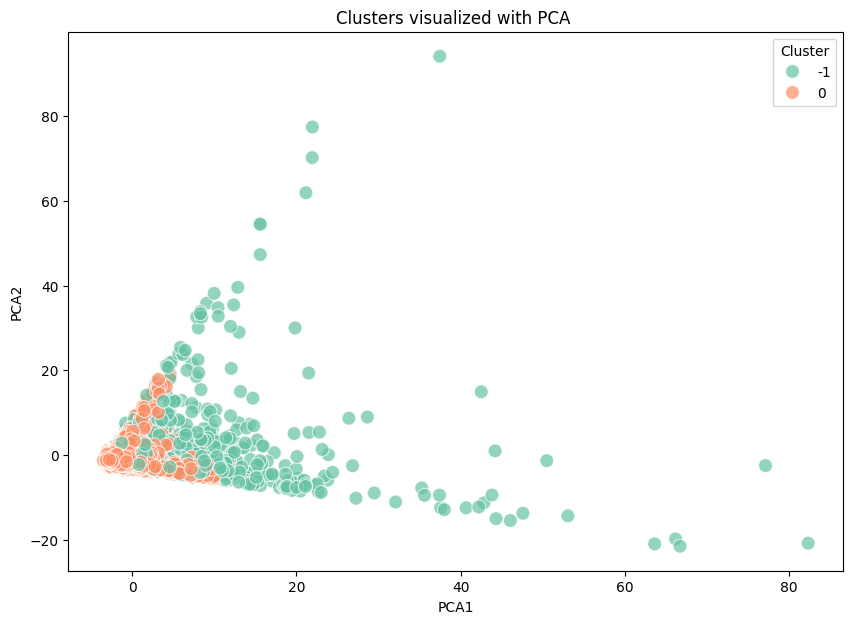

In [392]:
dbscan = DBSCAN(eps=3,min_samples=7)
labels = dbscan.fit_predict(df_robust)

visualize_clusters_with_pca(df_robust , labels)

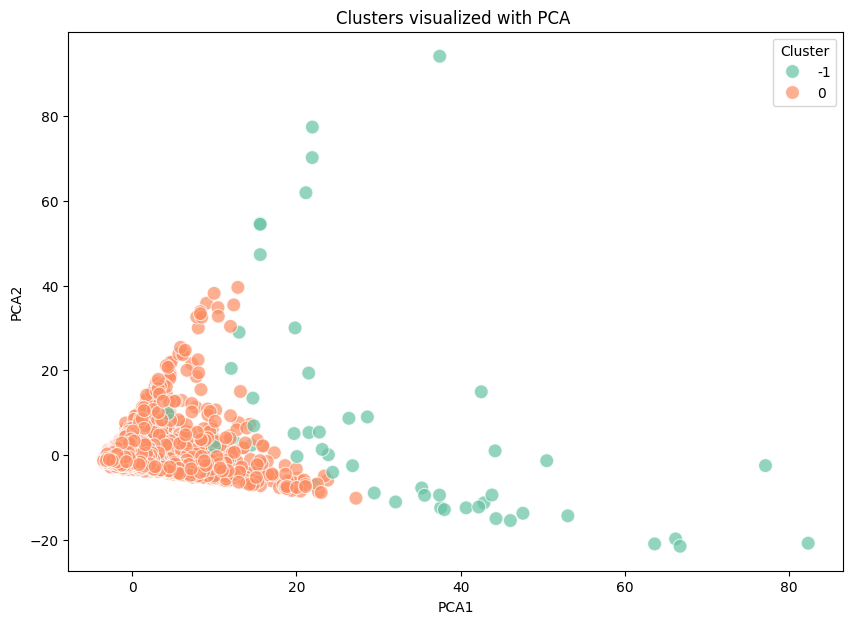

In [395]:
dbscan = DBSCAN(eps=9,min_samples=5)
labels = dbscan.fit_predict(df_robust)

visualize_clusters_with_pca(df_robust , labels)

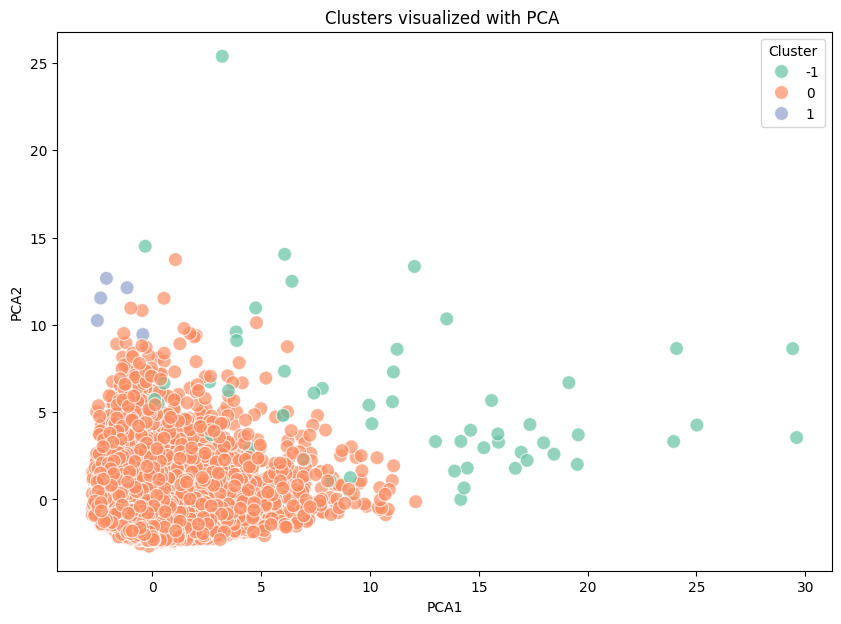

In [401]:
dbscan = DBSCAN(eps=5,min_samples=5)
labels = dbscan.fit_predict(df_std)

visualize_clusters_with_pca(df_std , labels)

# Agglomerative 

In [ ]:
# Great NOTE we can choose the optimal # of clusters by choosing the longest line that not croosed 

In [67]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [56]:
def Dendrogram(df,method='ward'):
    plt.figure(figsize=(20,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method = method))
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean distances')
    plt.show()

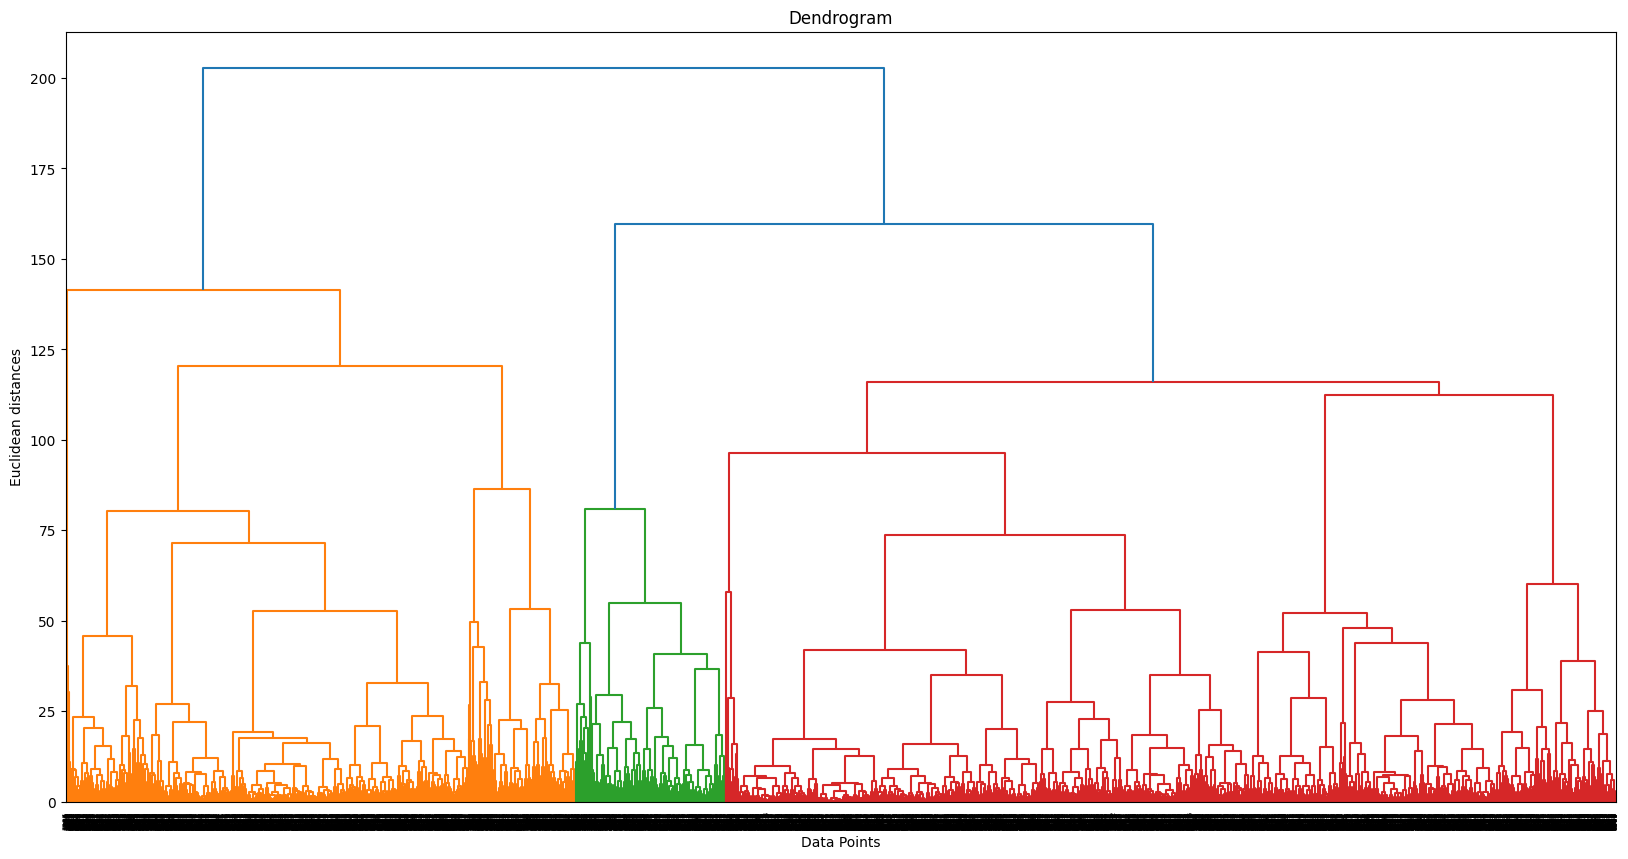

In [411]:
Dendrogram(df_std , 'ward')

In [413]:
# 2 clusters

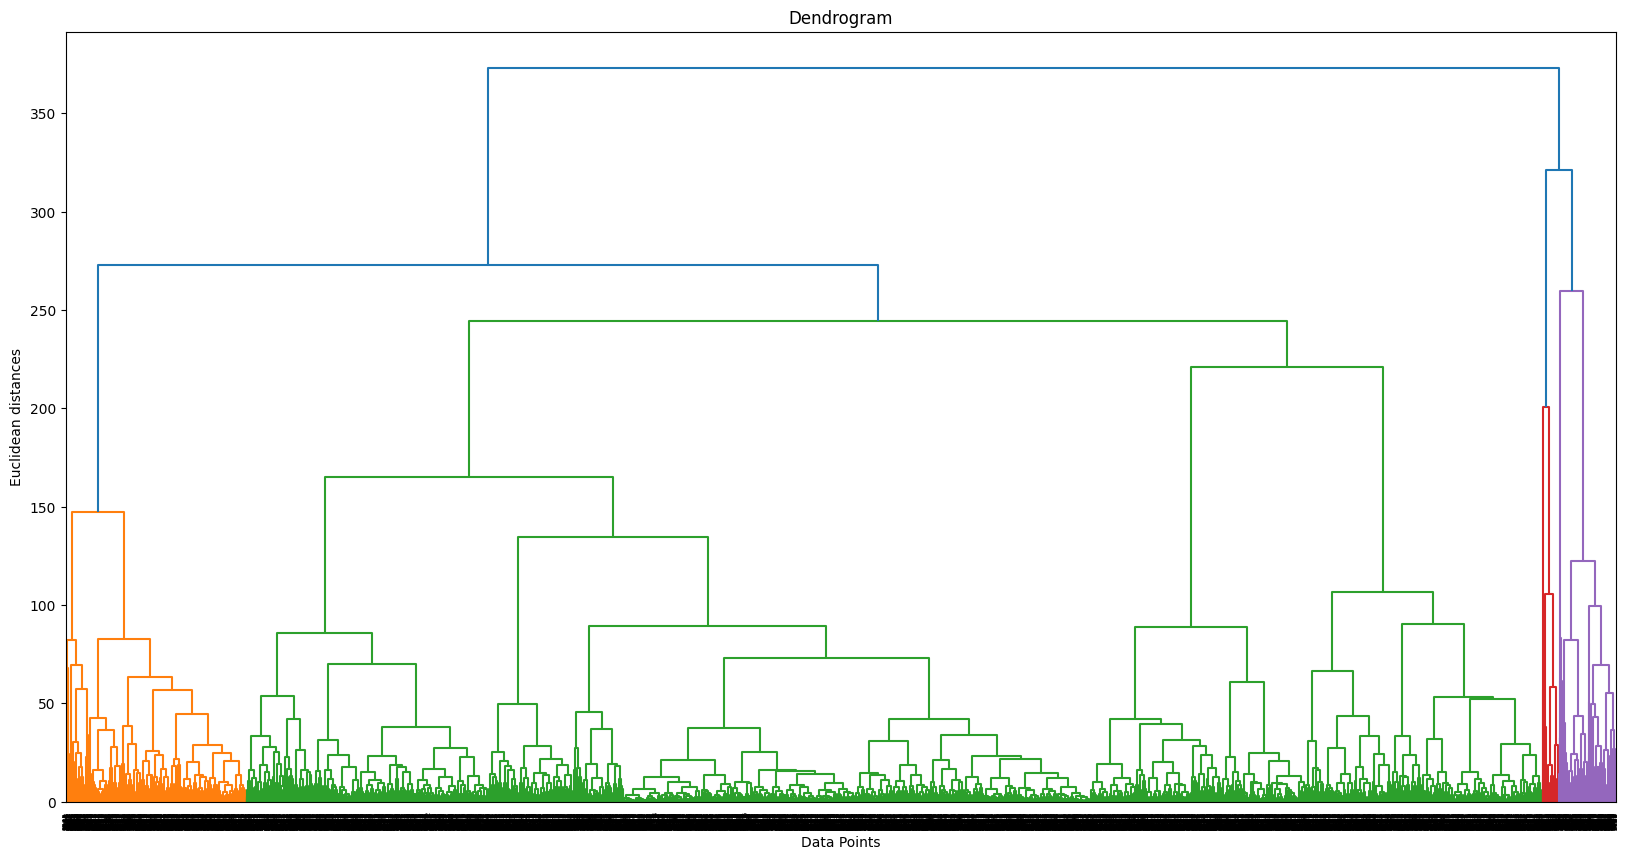

In [412]:
Dendrogram(df_robust,'ward')

In [ ]:
# 2 clusters 

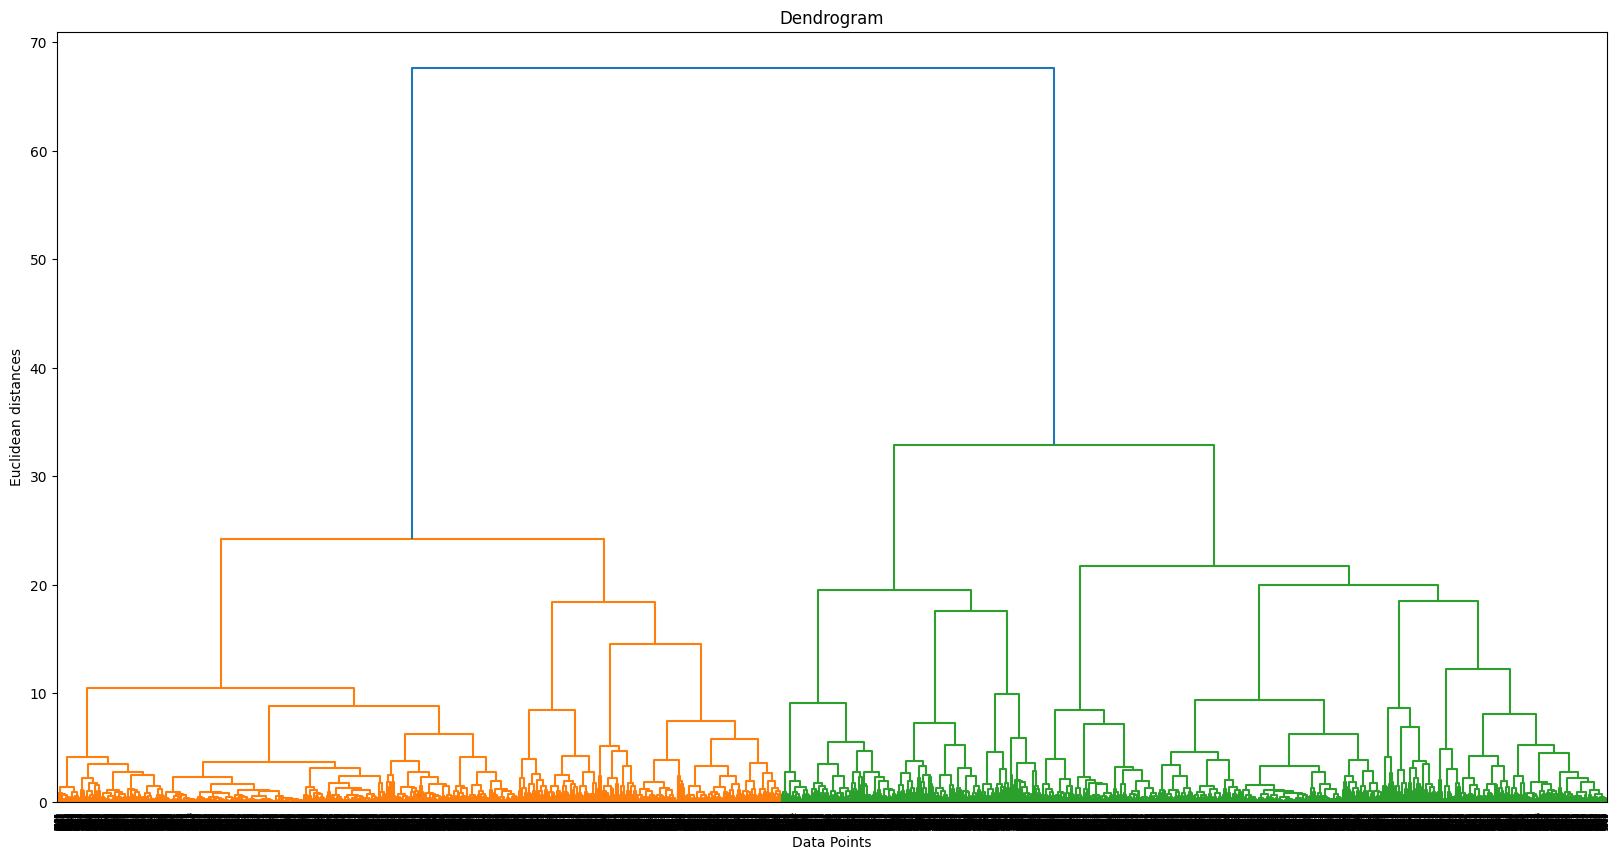

In [414]:
df_minmax=MinMaxScaler().fit_transform(df)
Dendrogram(df_minmax,'ward')

In [415]:
# 2 clusters

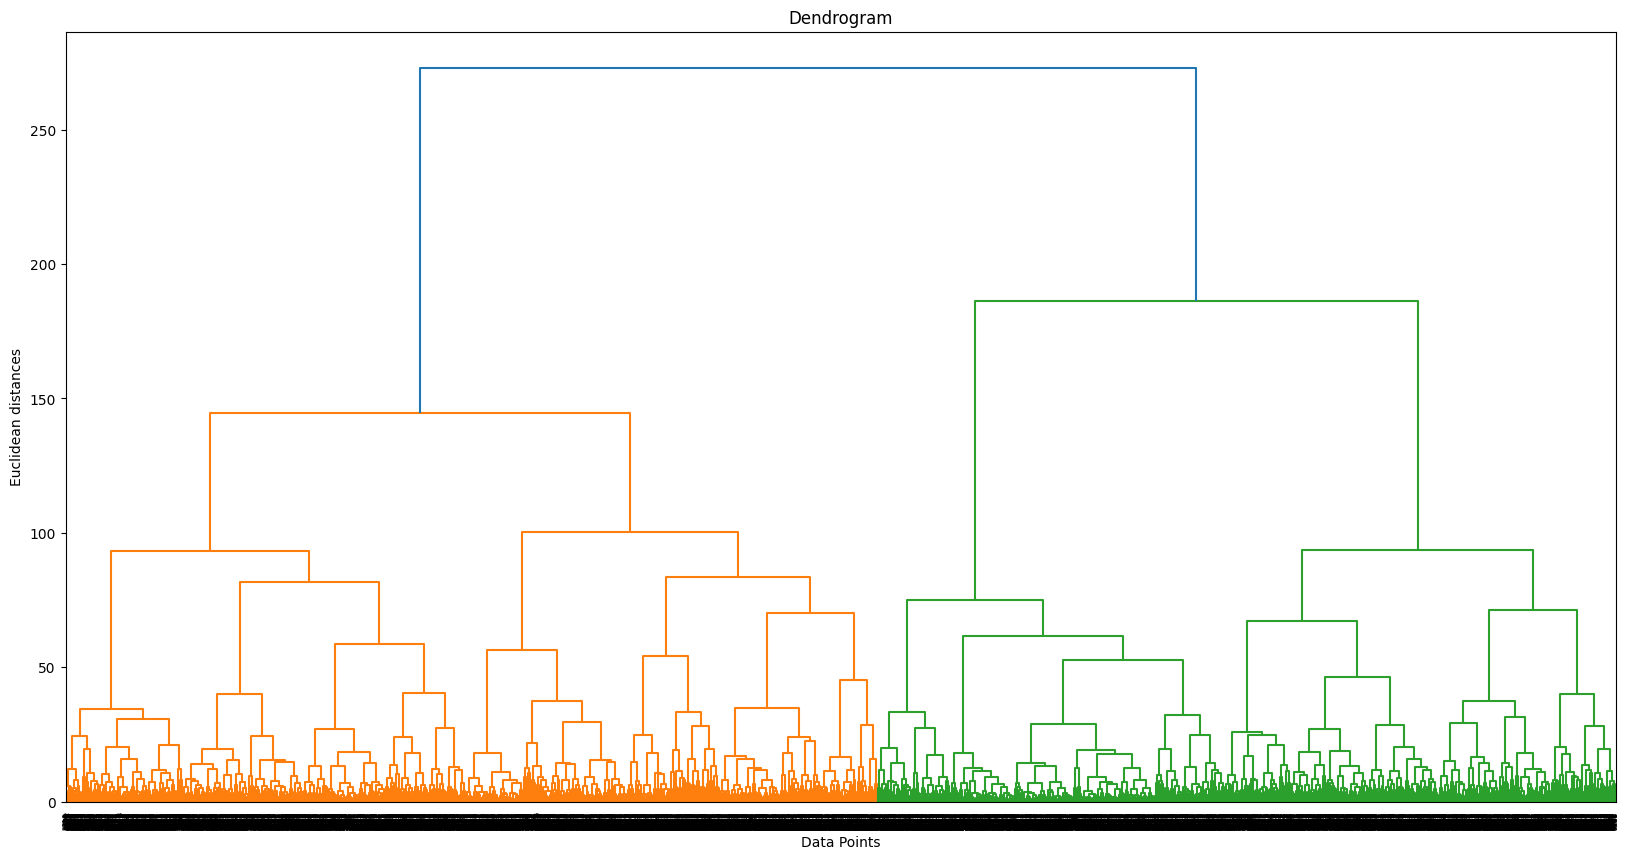

In [416]:
Dendrogram(df_yeo_stand,'ward')

In [418]:
# 2 clusters

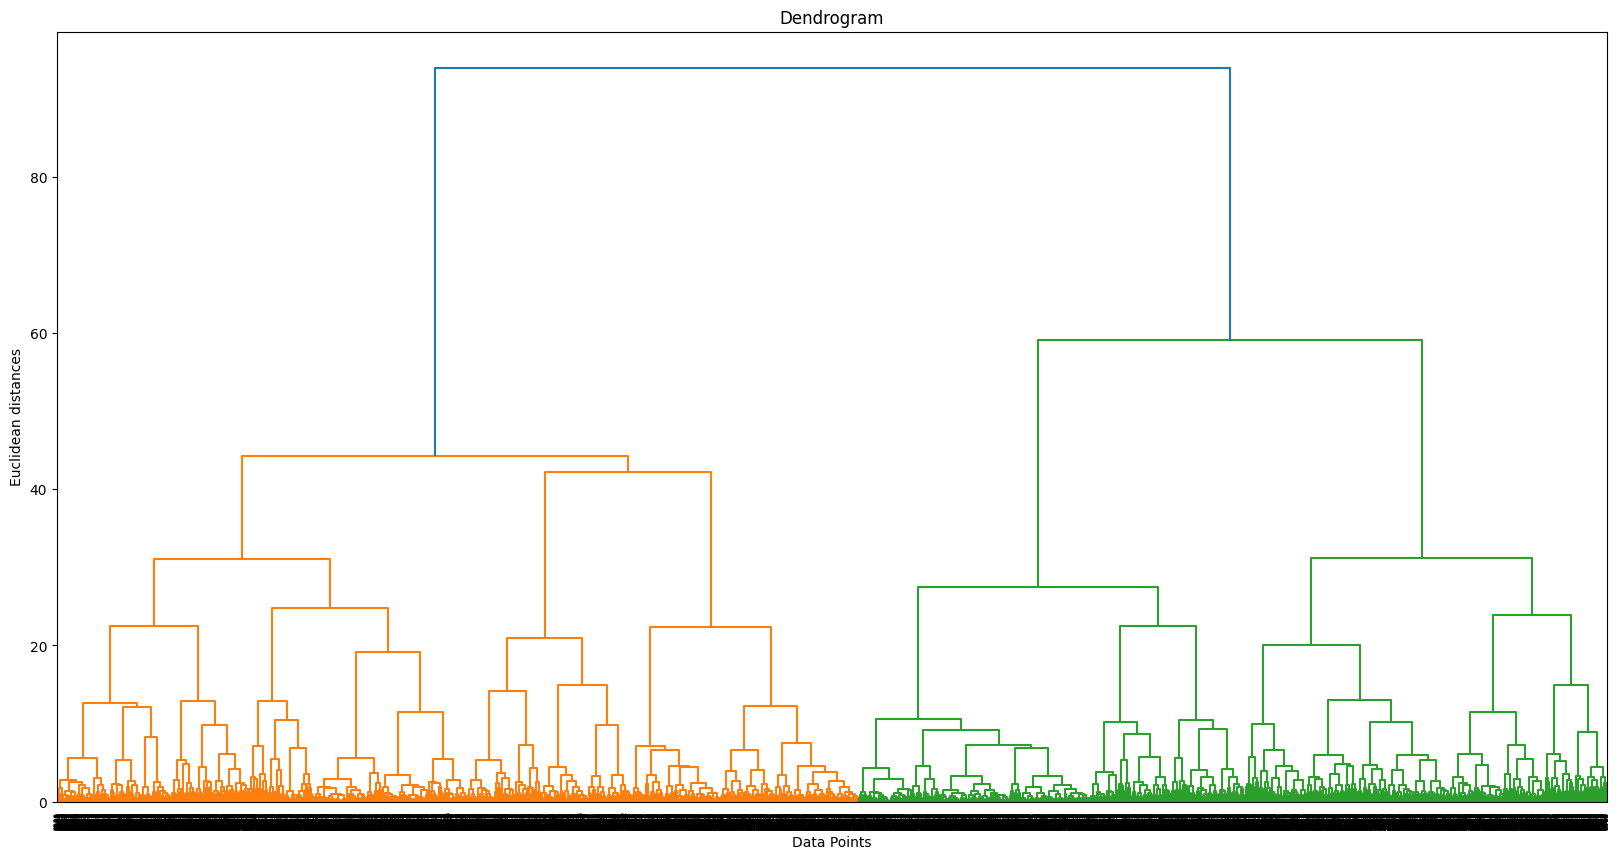

In [417]:
Dendrogram(df_yeo_minmax,'ward')

In [1]:
# 2 cluseters 

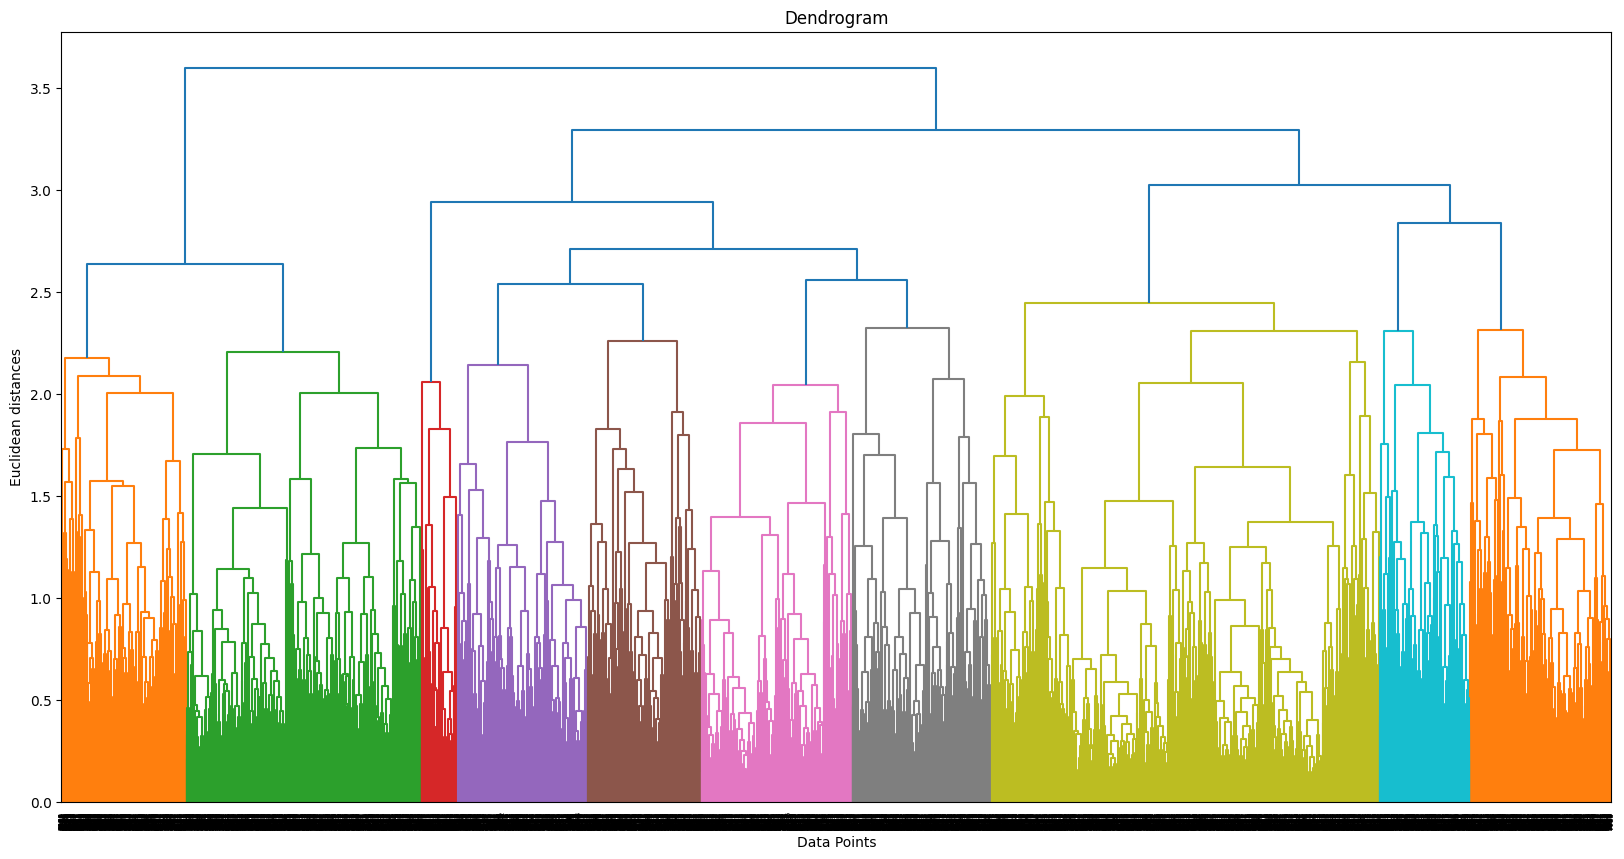

In [60]:
Dendrogram(df_yeo_minmax,'complete')

In [ ]:
# 2 or 3 clusters  

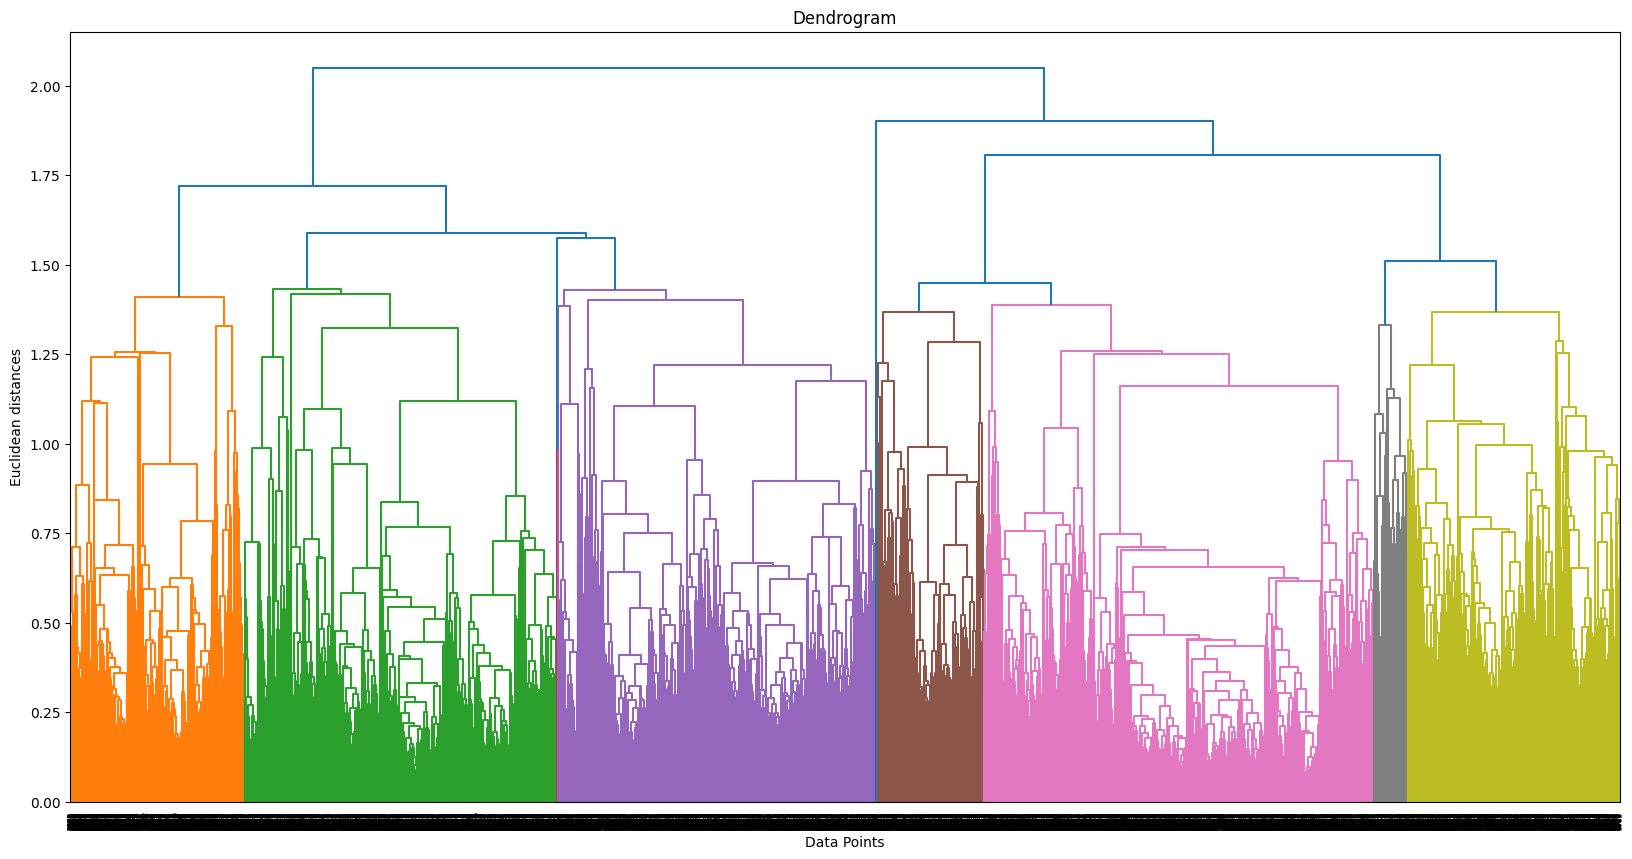

In [61]:
Dendrogram(df_yeo_minmax,'average')

In [ ]:
# 2 clusters

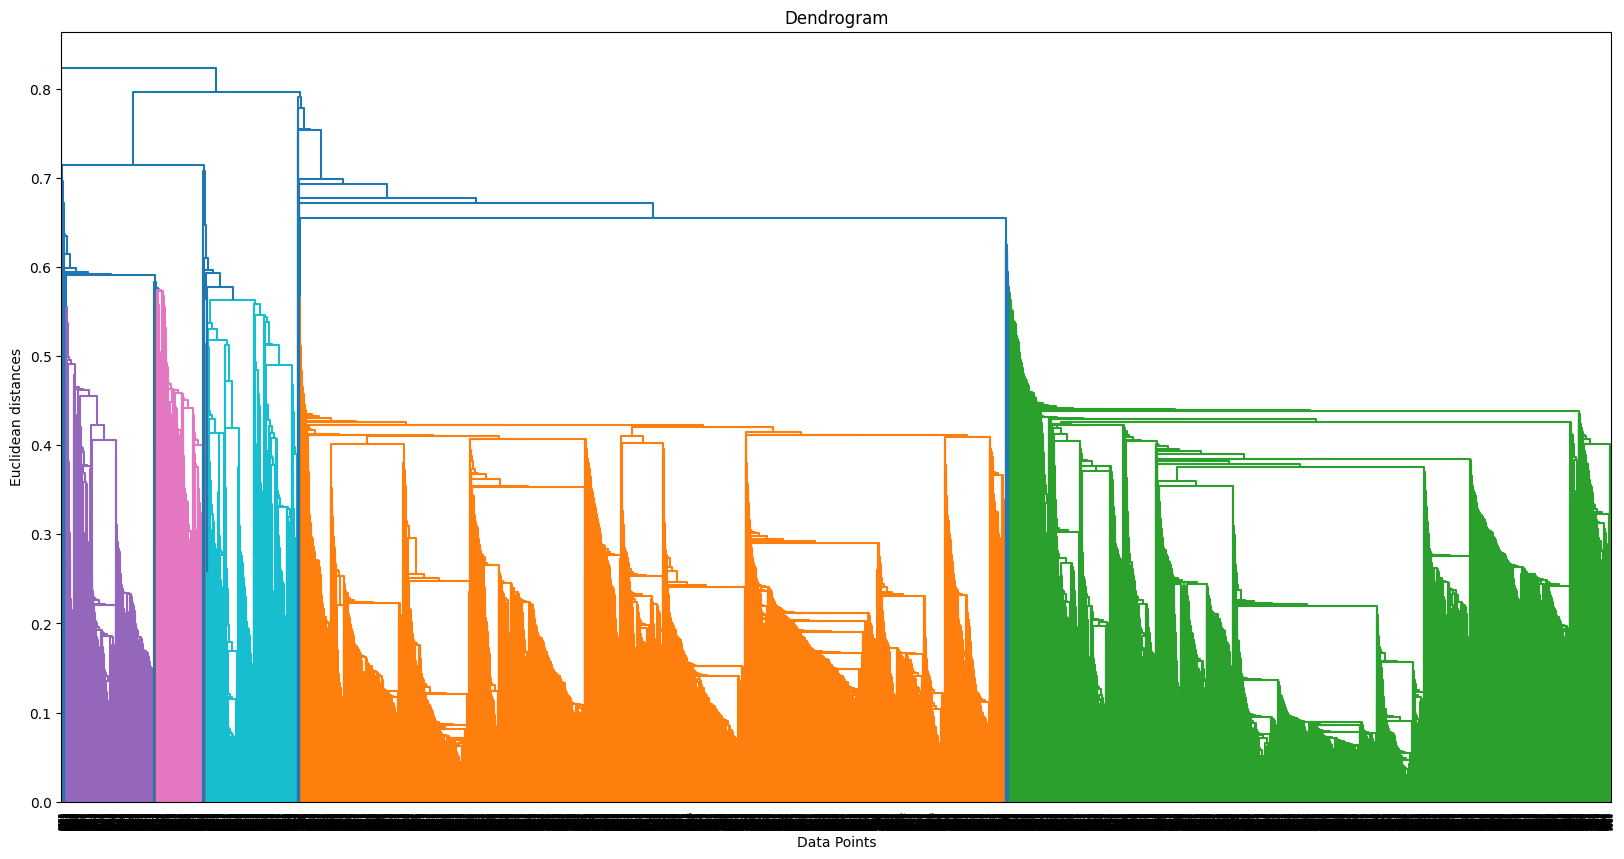

In [62]:
Dendrogram(df_yeo_minmax,'single')

In [63]:
# cannot see any 

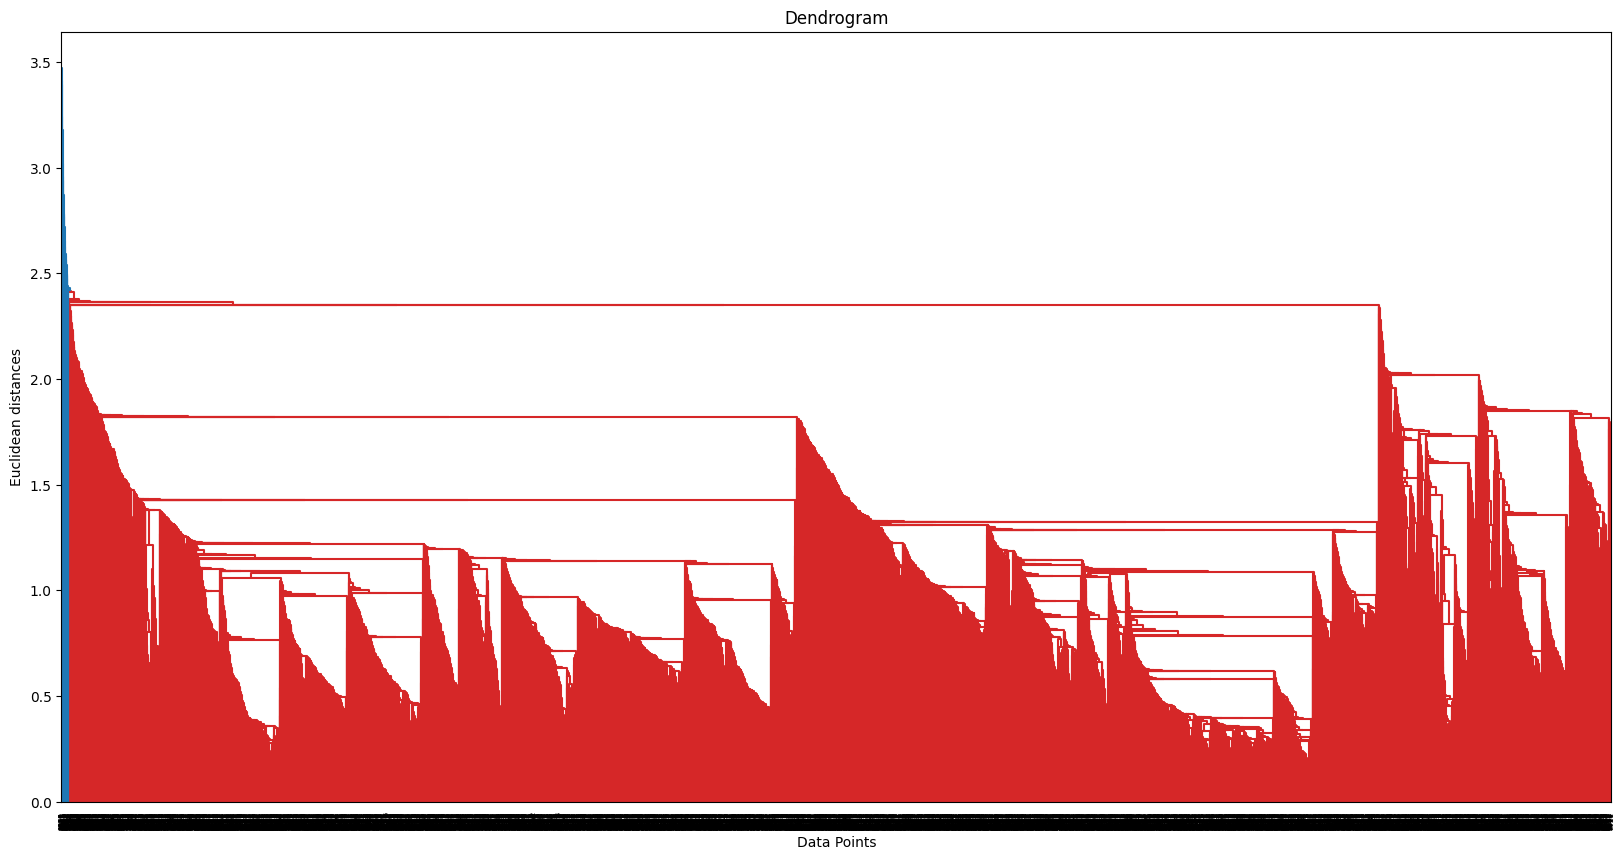

In [64]:
Dendrogram(df_yeo_std,'single')

In [65]:
def agglomerative_clustering_eval(df, n_clusters_range, method='ward'):
    silhouette_scores = {}

    for n_clusters in n_clusters_range:
        # Apply Agglomerative Clustering with the specified method
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        labels = clustering.fit_predict(df)
        
        # Calculate Silhouette Score
        score = silhouette_score(df, labels)
        silhouette_scores[n_clusters] = score

    # Plot Silhouette Scores
    plt.figure(figsize=(8, 5))
    plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
    plt.title(f'Silhouette Score for Different Number of Clusters (Method: {method})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

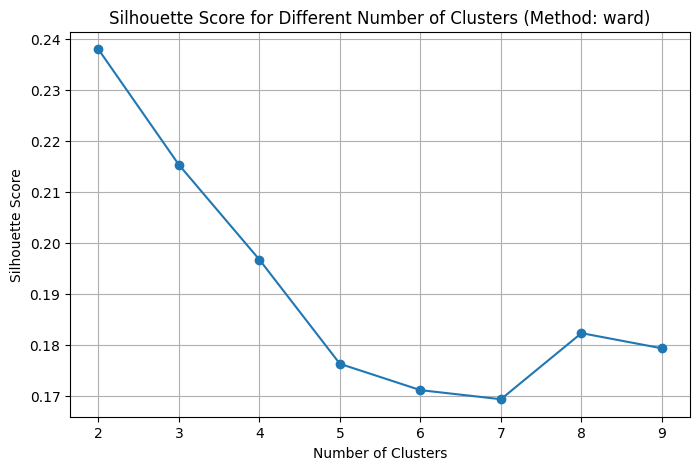

In [69]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_std,n_clusters_range,'ward')

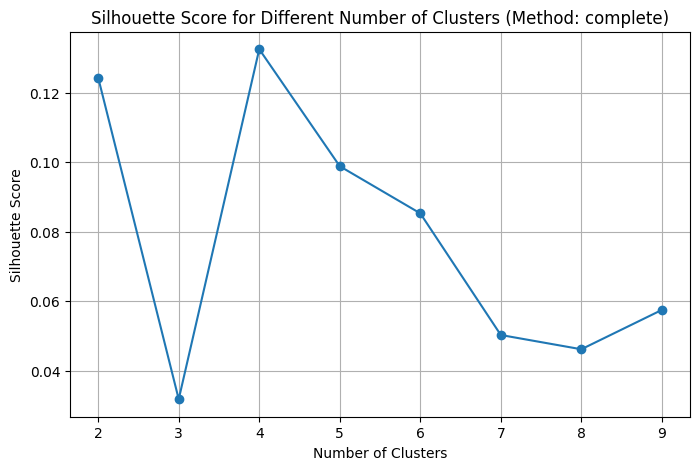

In [70]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_std,n_clusters_range,'complete')

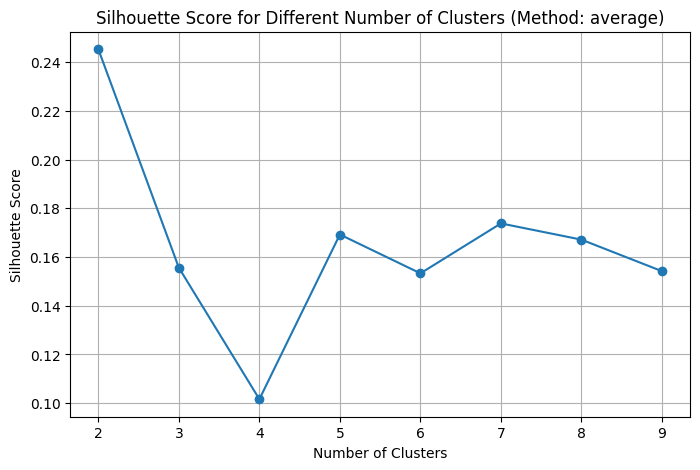

In [71]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_std,n_clusters_range,'average')

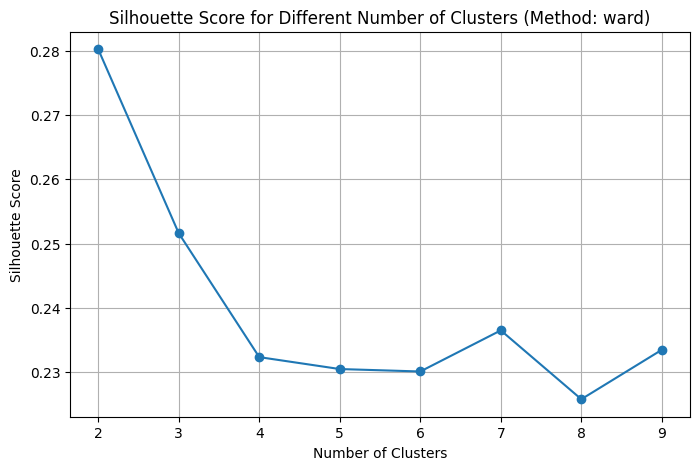

In [72]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_minmax,n_clusters_range,'ward')

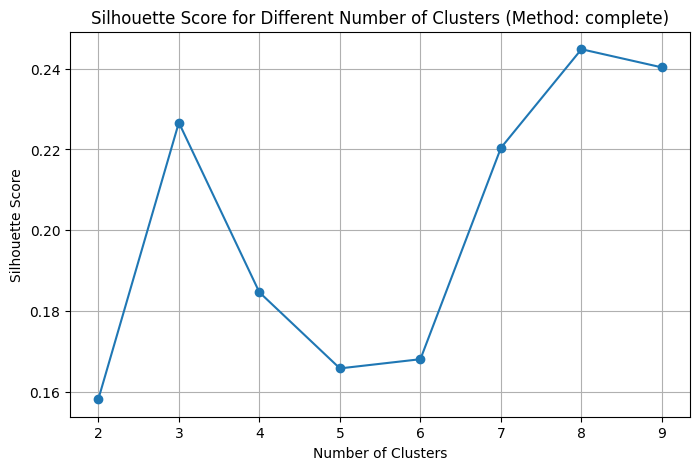

In [73]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_minmax,n_clusters_range,'complete')

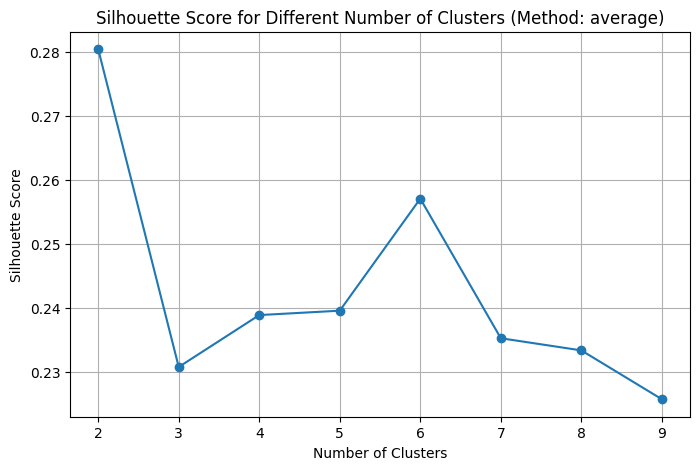

In [74]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_minmax,n_clusters_range,'average')

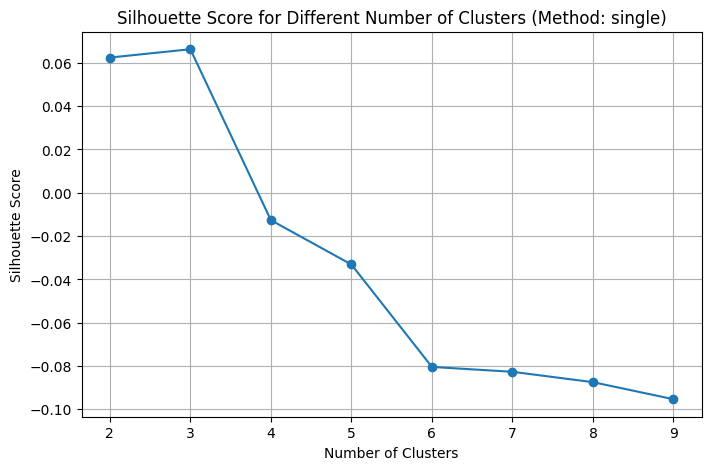

In [76]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_minmax,n_clusters_range,'single')

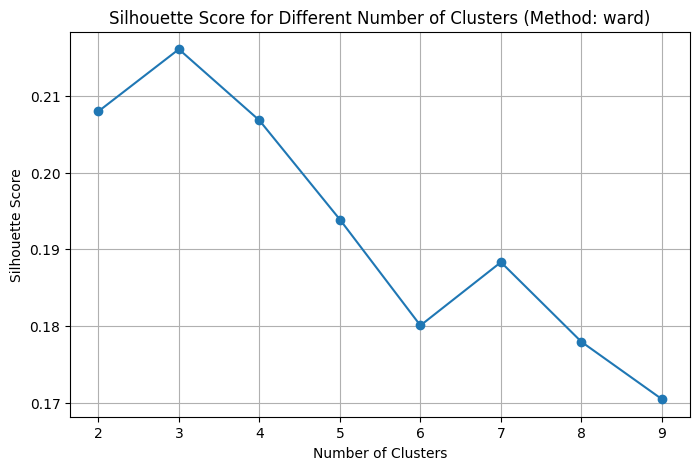

In [75]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_robust,n_clusters_range,'ward')

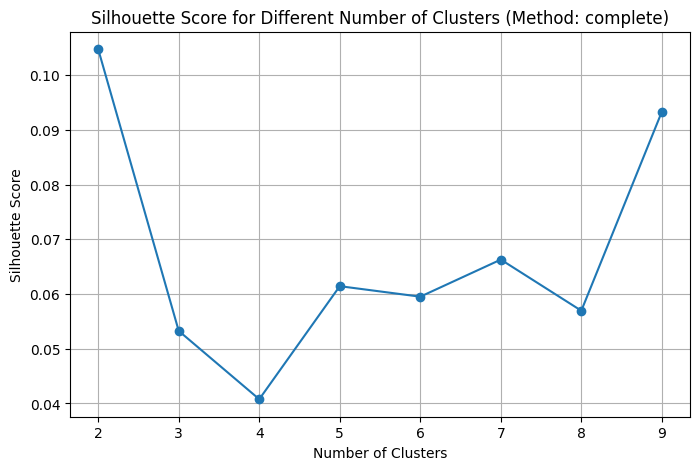

In [77]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_robust,n_clusters_range,'complete')

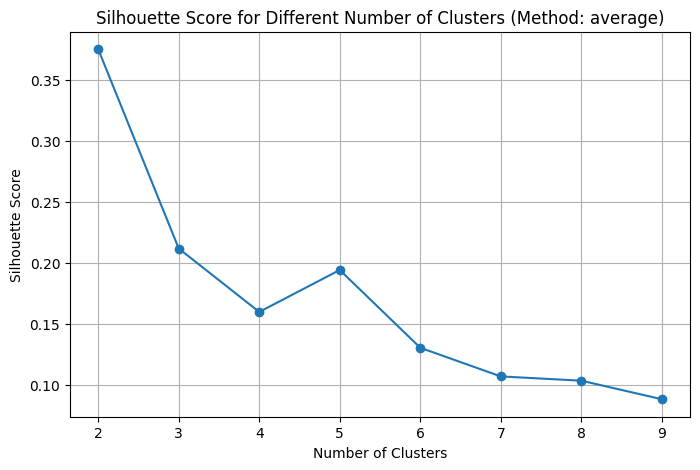

In [78]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_yeo_robust,n_clusters_range,'average')

###### with out transformation 

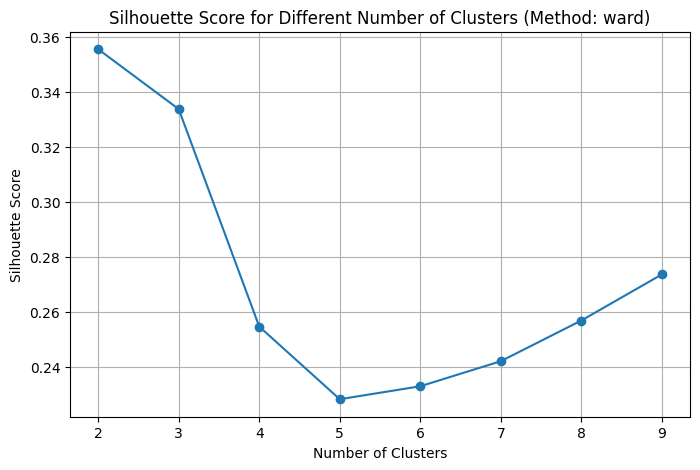

In [79]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_minmax,n_clusters_range,'ward')

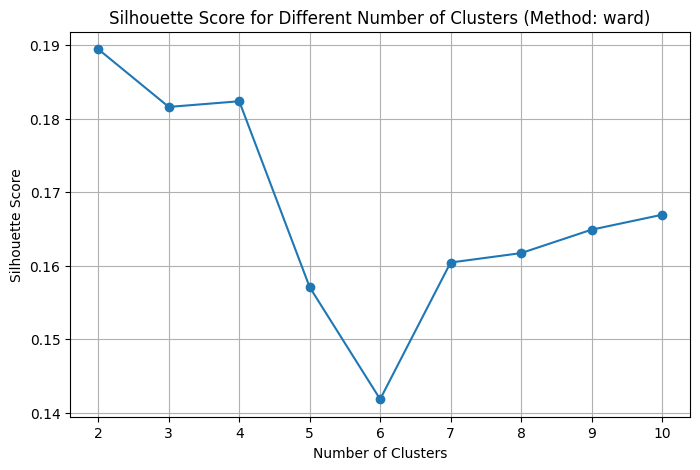

In [80]:
n_clusters_range = range(2, 11)
agglomerative_clustering_eval(df_std,n_clusters_range,'ward')

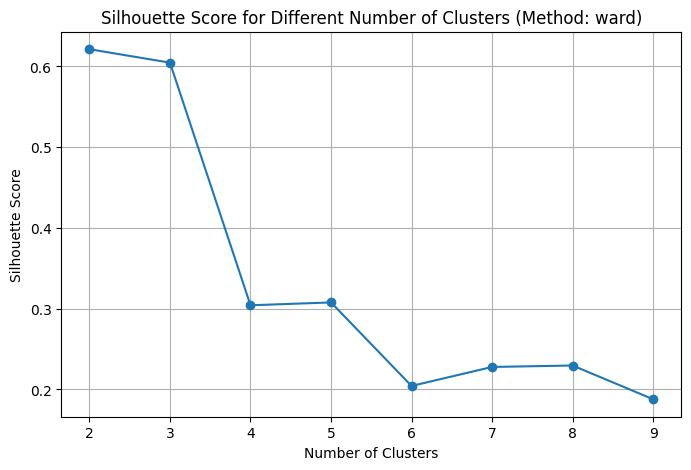

In [81]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_robust,n_clusters_range,'ward')

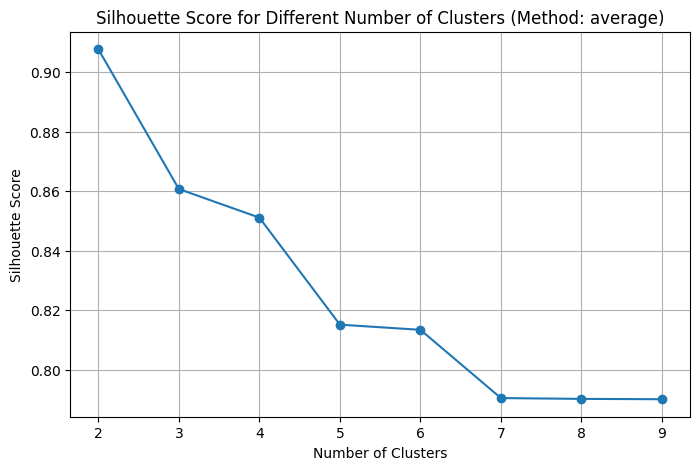

In [82]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_robust,n_clusters_range,'average')

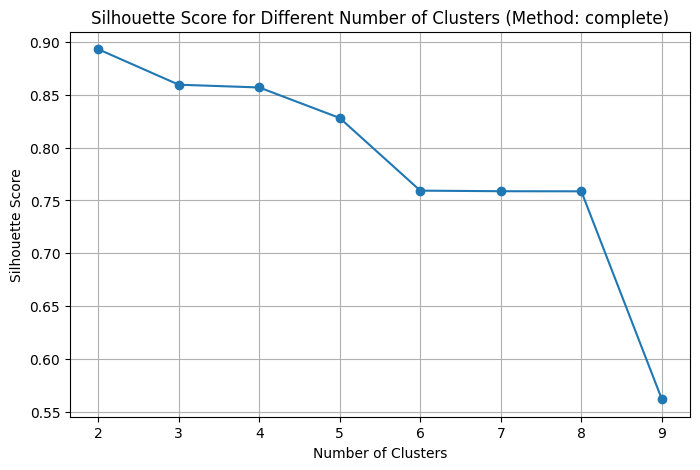

In [83]:
n_clusters_range = range(2, 10)
agglomerative_clustering_eval(df_robust,n_clusters_range,'complete')

##### visualize the clustering 

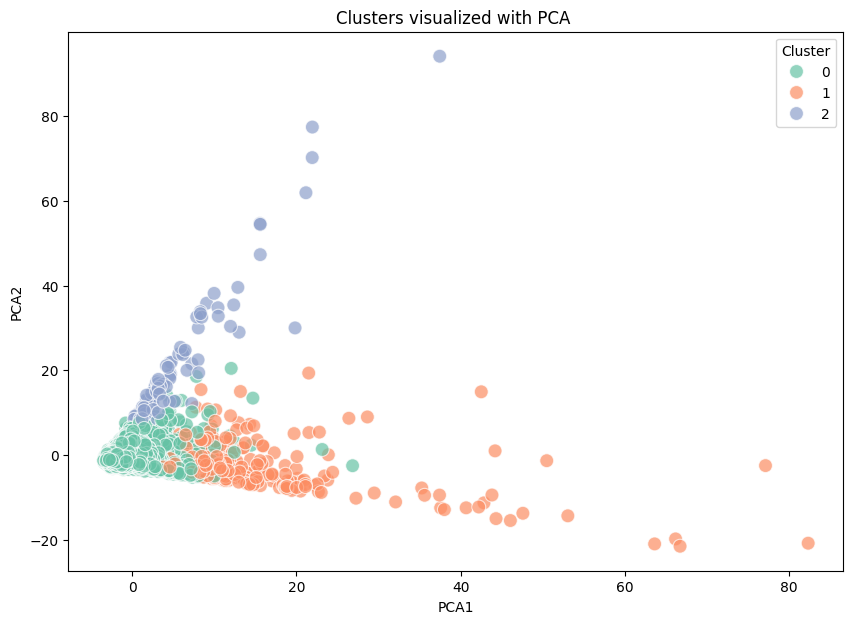

In [85]:
clustering = AgglomerativeClustering(n_clusters=3,linkage='ward')
labels = clustering.fit_predict(df_robust)

visualize_clusters_with_pca(df_robust , labels)

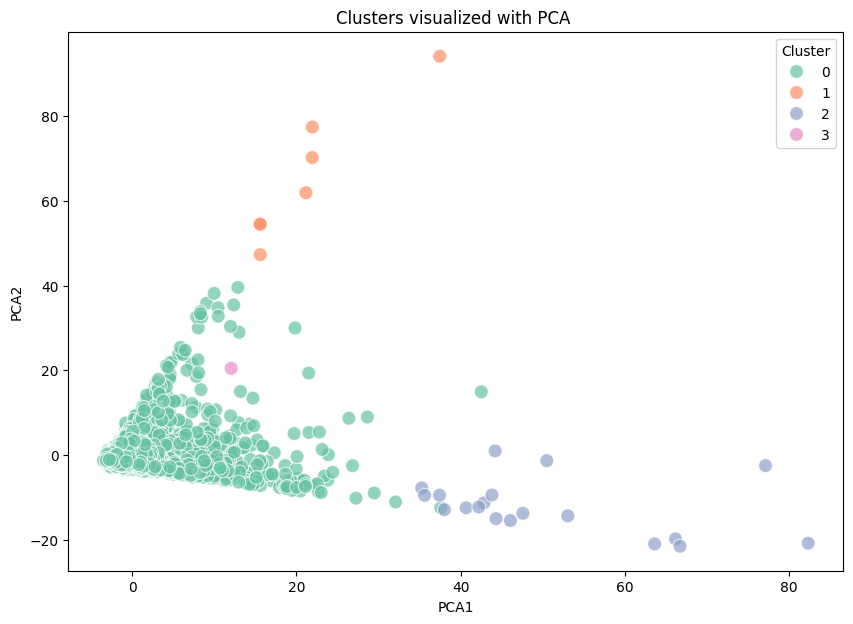

In [86]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='complete')
labels = clustering.fit_predict(df_robust)

visualize_clusters_with_pca(df_robust , labels)

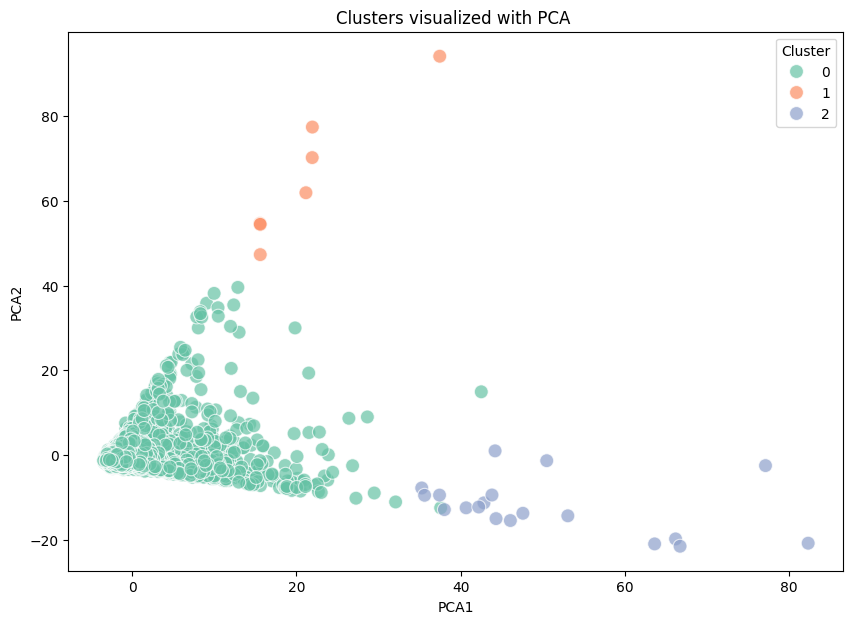

In [87]:
clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
labels = clustering.fit_predict(df_robust)

visualize_clusters_with_pca(df_robust , labels)

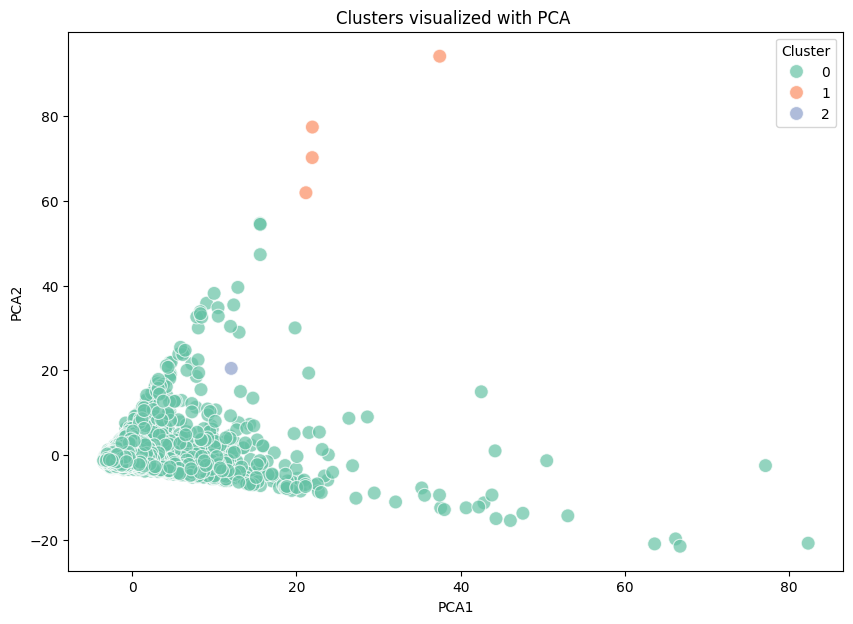

In [88]:
clustering = AgglomerativeClustering(n_clusters=3,linkage='average')
labels = clustering.fit_predict(df_robust)

visualize_clusters_with_pca(df_robust , labels)

In [419]:
# to evaluate agglomeartive clustering there is diff ways


##  Intrinsic Evaluation (without true labels) : 
### Silhouette Score 
### Davies-Bouldin
### Index Dunn Index


##  IExtrinsic Evaluation (with true labels) : 
### Adjusted Rand Index (ARI) 
### Normalized Mutual Information (NMI)
### Index Dunn Index


## Elbow Method for Selecting the Optimal Number of Clusters


## Dendrogram for Hierarchical Clustering
